Código para realizar predicciones sobre el tipo de prenda y las texturas de estas a las publicaciones de Instagram y crear gráficos sobre, predicciones de ropa y texturas de ropa a lo largo del tiempo

In [1]:
from keras.models import load_model

model = load_model("model/vgg.h5")

model.summary()

KeyboardInterrupt: 

In [2]:
input_shape = model.input_shape
print(input_shape)

(None, 224, 224, 3)


In [7]:
clase_numero_a_string = {
    0: 'Blouse',
    1: 'Dress',
    2: 'Jacket',
    3: 'Jeans',
    4: 'Shorts',
    5: 'Skirt',
    6: 'Sweater',
    7: 'Tee',
    8: 'Top'
}

In [73]:
import cv2
import pandas as pd
import numpy as np
import os
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

new_width = 224
new_height = 224

predictions_data = {'carpeta_numero': [], 'nombre_imagen': [], 'prediccion': []}
perfil = 'raquelcanas'
ruta_carpeta = f'bboximages/{perfil}'

# Iterar sobre los elementos de la carpeta
for raiz, carpetas_directorio, archivos in os.walk(ruta_carpeta):
    for archivo in archivos:
        # Filtrar solo los archivos de imagen (puedes agregar más extensiones según tus necesidades)
        extensiones_permitidas = [".jpg", ".jpeg", ".png", ".gif"]
        if any(archivo.endswith(ext) for ext in extensiones_permitidas):
            # Imprimir la ruta completa del archivo de imagen
            ruta_completa = os.path.join(raiz, archivo)
            carpeta_numero = os.path.basename(raiz)
            
            img = image.load_img(ruta_completa, target_size=(224, 224))  # Ajusta el tamaño según tu modelo
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = preprocess_input(img_array)

            # Realizar la predicción
            prediction = model.predict(img_array)

            # Obtener la clase predicha (0 al 4 en este caso)
            predicted_class = np.argmax(prediction)

            # Mapear el número de clase a su correspondiente string
            predicted_class_string = clase_numero_a_string[predicted_class]

            # Almacena la información en el diccionario de datos
            predictions_data['carpeta_numero'].append(carpeta_numero)
            predictions_data['nombre_imagen'].append([archivo])
            predictions_data['prediccion'].append([predicted_class_string])

# Create a DataFrame from the data
df_predictions = pd.DataFrame(predictions_data)

# Agrupar por carpeta_numero y agregar las listas de nombre_imagen y prediccion
df_grouped = df_predictions.groupby('carpeta_numero').agg({'nombre_imagen': list, 'prediccion': list}).reset_index()

# Imprimir el nuevo DataFrame
print(df_grouped)

1/1 [==============================] - 0s 252ms/step
           carpeta_numero                                      nombre_imagen  \
0     1417763432044000401                        [[1417763432044000401.jpg]]   
1     1418349456876994330                        [[1418349456876994330.jpg]]   
2     1418495598893828413                        [[1418495598893828413.jpg]]   
3     1418553529010004918                        [[1418553529010004918.jpg]]   
4     1420637842983697168                        [[1420637842983697168.jpg]]   
...                   ...                                                ...   
1235  3180391334677033397  [[2023-08-29_23-36-53_UTC_7.jpg], [31803913346...   
1236  3181851434939779896  [[2023-08-31_23-57-50_UTC_4.jpg], [31818514349...   
1237  3185474732080748451  [[2023-09-05_23-56-41_UTC_6.jpg], [31854747320...   
1238  3205767730580416619  [[2023-10-03_23-55-15_UTC_8.jpg], [32057677305...   
1239  3223656191053441376  [[3223656191053441376_1.jpg], [322365619

In [74]:
df_grouped

,carpeta_numero,nombre_imagen,prediccion
0,1417763432044000401,[[1417763432044000401.jpg]],[[Sweater]]
1,1418349456876994330,[[1418349456876994330.jpg]],[[Jeans]]
2,1418495598893828413,[[1418495598893828413.jpg]],[[Dress]]
3,1418553529010004918,[[1418553529010004918.jpg]],[[Skirt]]
4,1420637842983697168,[[1420637842983697168.jpg]],[[Skirt]]
...,...,...,...
1235,3180391334677033397,"[[2023-08-29_23-36-53_UTC_7.jpg], [31803913346...","[[Jacket], [Jacket], [Jeans], [Jeans], [Jacket..."
1236,3181851434939779896,"[[2023-08-31_23-57-50_UTC_4.jpg], [31818514349...","[[Skirt], [Skirt], [Dress], [Dress]]"
1237,3185474732080748451,"[[2023-09-05_23-56-41_UTC_6.jpg], [31854747320...","[[Tee], [Blouse], [Dress], [Tee], [Jacket], [D..."
1238,3205767730580416619,"[[2023-10-03_23-55-15_UTC_8.jpg], [32057677305...","[[Jacket], [Skirt], [Jeans], [Dress], [Tee], [..."


In [75]:
df_grouped.to_csv(f'predicciones/{perfil}.csv')

In [35]:
import os
import pandas as pd

# Ruta de la carpeta que contiene los archivos CSV
ruta_carpeta = 'csv'
ruta_sentimientos = 'data'

# Obtener la lista de archivos en la carpeta
archivos_en_carpeta = os.listdir(ruta_carpeta)
archivos_sentiment = os.listdir(ruta_sentimientos)

# Filtrar solo los archivos CSV
archivos_csv = [archivo for archivo in archivos_en_carpeta if archivo.endswith('.csv')]
archivos_sentiment = [archivo for archivo in archivos_sentiment if archivo.endswith('.csv')]

# Imprimir o utilizar el array de nombres de archivos CSV
print(archivos_csv)
print(archivos_sentiment)

for archivo, sentiment in zip(archivos_csv, archivos_sentiment):
    # Construir la ruta completa al archivo CSV
    ruta_completa = os.path.join(ruta_carpeta, archivo)
    ruta_completa_sen = os.path.join(ruta_sentimientos, sentiment)

    # Leer el archivo CSV
    df = pd.read_csv(ruta_completa)
    df_sentiment = pd.read_csv(ruta_completa_sen)

    # Fusionar DataFrames basándose en la relación entre post_id y mediaid
    df_combinado = pd.merge(df, df_sentiment, left_on='post_id', right_on='mediaid', how='left')

    # # Eliminar la columna específica (reemplaza 'nombre_imagen' con el nombre de la columna que deseas eliminar)
    df_combinado = df_combinado.drop(['mediaid','title','owner_username','mediacount','url','caption','caption_hashtags','caption_mentions','tagged_users','is_sponsored'], axis=1)

    # Eliminar la columna de índice (Unnamed: 0)
    df_combinado = df_combinado.loc[:, ~df_combinado.columns.str.contains('^Unnamed')]

    # Guardar el DataFrame combinado en la nueva carpeta
    nuevo_nombre = f'FULL/{archivo}'  # Puedes cambiar el nombre si lo deseas
    df_combinado.to_csv(nuevo_nombre, index=False)


['anabelizam.csv', 'belenegri.csv', 'danielasalazarc_.csv', 'domelipa.csv', 'gianninaazar.csv', 'patryjordan.csv', 'raquelcanas.csv', 'secretosdechicas.csv', 'tutivargasm.csv']
['anabelizam.csv', 'belenegri.csv', 'danielasalazarc_.csv', 'domelipa.csv', 'gianninaazar.csv', 'patryjordan.csv', 'raquelcanas.csv', 'secretosdechicas.csv', 'tutivargasm.csv']


In [32]:
emp = pd.read_csv('csv/raquelcanas.csv')
# Eliminar las filas que no tienen valores en la columna 'prediccion'
emp = emp.dropna(subset=['prediccion'])
emp.to_csv('csv/raquelcanas.csv',index=False)

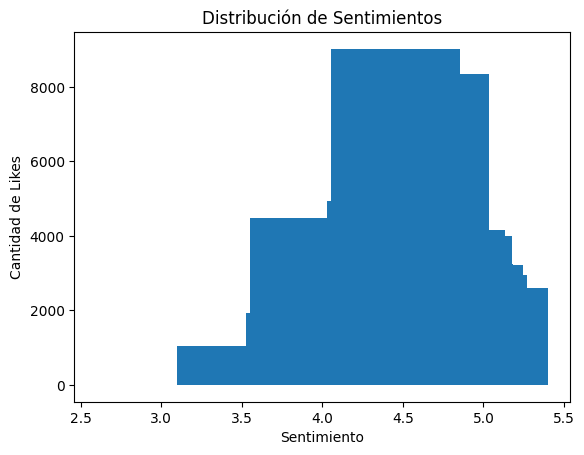

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('FULL/anabelizam.csv')

# Gráfico de barras para sentiment_label
plt.bar(df['sentiment_label'], df['likes'])
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Likes')
plt.title('Distribución de Sentimientos')
plt.show()


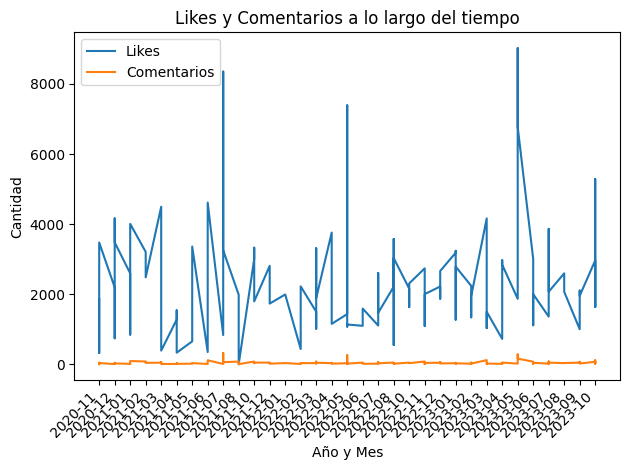

In [63]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('FULL/anabelizam.csv')

# Convertir la columna de fecha a tipo datetime con el formato específico
df['date_local'] = pd.to_datetime(df['date_local'], format="%Y-%m-%d_%H-%M-%S_UTC")

# Crear una nueva columna con solo año y mes
df['year_month'] = df['date_local'].dt.to_period('M')

# Convertir 'year_month' a cadena
df['year_month_str'] = df['year_month'].astype(str)

# Gráfico de líneas para likes y comentarios a lo largo del tiempo
plt.plot(df['year_month_str'], df['likes'], label='Likes')
plt.plot(df['year_month_str'], df['comments'], label='Comentarios')
plt.xlabel('Año y Mes')
plt.ylabel('Cantidad')
plt.title('Likes y Comentarios a lo largo del tiempo')
plt.legend()

# Rotar las etiquetas del eje X para mejorar la legibilidad
plt.xticks(rotation=45, ha="right")  # Ajusta el ángulo de rotación según sea necesario

plt.tight_layout()  # Ajusta automáticamente los márgenes para evitar cortar las etiquetas
plt.show()


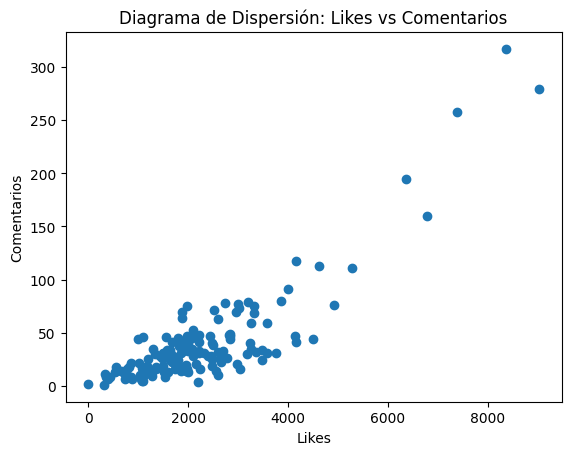

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('FULL/anabelizam.csv')

# Diagrama de dispersión para likes vs comentarios
plt.scatter(df['likes'], df['comments'])
plt.xlabel('Likes')
plt.ylabel('Comentarios')
plt.title('Diagrama de Dispersión: Likes vs Comentarios')
plt.show()


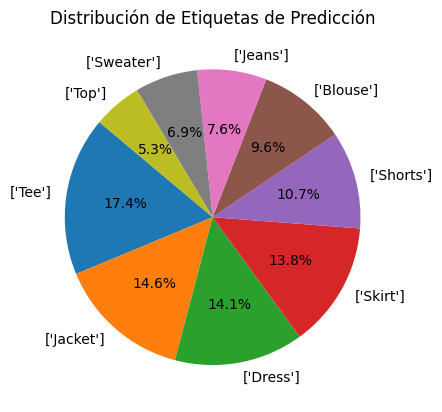

In [58]:
import matplotlib.pyplot as plt
import ast
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('FULL/anabelizam.csv')

# Convertir la columna de predicción a una lista de listas
df['prediccion'] = df['prediccion'].apply(ast.literal_eval)

# Obtener una lista plana de todas las etiquetas
all_labels = [label for sublist in df['prediccion'] for label in sublist]

# Contar la frecuencia de cada etiqueta
label_counts = pd.Series(all_labels).value_counts()

# Gráfico de pastel para la distribución de etiquetas
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Etiquetas de Predicción')
plt.show()


In [76]:
import pandas as pd
import ast

# Lee el archivo CSV
df = pd.read_csv('FULL/anabelizam.csv')

# Convierte la columna 'prediccion' de cadena a lista
df['prediccion'] = df['prediccion'].apply(ast.literal_eval)

# Explota la columna 'prediccion' para que cada etiqueta tenga su propia fila
df_explotado = df.explode('prediccion')

# Convierte las etiquetas a una cadena
df_explotado['prediccion'] = df_explotado['prediccion'].apply(str)

# Crea un DataFrame con las etiquetas y los valores correspondientes de 'sentiment_label'
df_etiquetas = pd.DataFrame({'etiqueta': df_explotado['prediccion'], 'sentiment_label': df_explotado['sentiment_label'].tolist()})

# Calcula el promedio de 'sentiment_label' para cada etiqueta
promedio_por_etiqueta = df_etiquetas.groupby('etiqueta')['sentiment_label'].mean().reset_index()

# Imprime el resultado
print(promedio_por_etiqueta)

      etiqueta  sentiment_label
0   ['Blouse']         4.530030
1    ['Dress']         4.595028
2   ['Jacket']         4.598668
3    ['Jeans']         4.602232
4   ['Shorts']         4.584102
5    ['Skirt']         4.596958
6  ['Sweater']         4.628214
7      ['Tee']         4.621697
8      ['Top']         4.594095


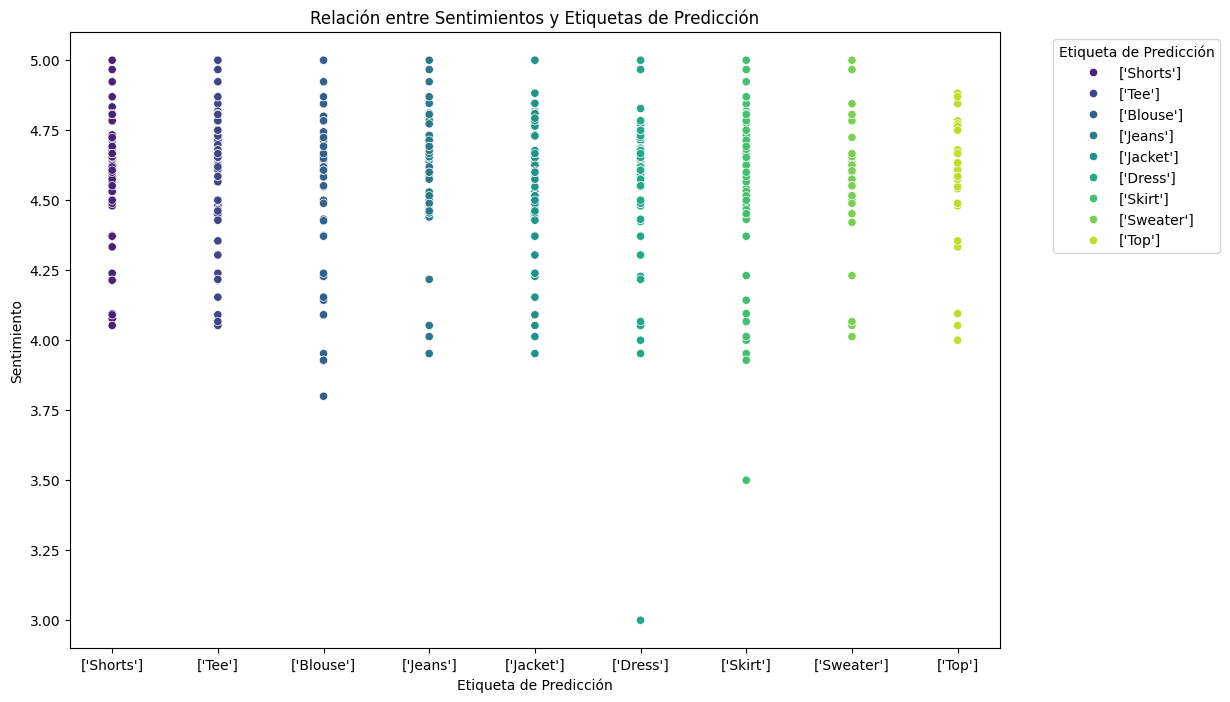

In [82]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle


# Lee el archivo CSV
df = pd.read_csv('FULL/anabelizam.csv')

# Convierte la columna 'prediccion' de cadena a lista
df['prediccion'] = df['prediccion'].apply(ast.literal_eval)

# Explota la columna 'prediccion' para que cada etiqueta tenga su propia fila
df_explotado = df.explode('prediccion')

# Convierte las etiquetas a una cadena
df_explotado['prediccion'] = df_explotado['prediccion'].apply(str)

# Crea un DataFrame con las etiquetas y los valores correspondientes de 'sentiment_label'
df_etiquetas = pd.DataFrame({'etiqueta': df_explotado['prediccion'], 'sentiment_label': df_explotado['sentiment_label'].tolist()})

# Grafica la relación entre 'sentiment_label' y 'etiqueta'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_etiquetas, x='etiqueta', y='sentiment_label', hue='etiqueta', palette='viridis')
plt.title('Relación entre Sentimientos y Etiquetas de Predicción')
plt.xlabel('Etiqueta de Predicción')
plt.ylabel('Sentimiento')
plt.legend(title='Etiqueta de Predicción', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\32538408.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promedio_por_etiqueta, x='etiqueta', y='sentiment_label', palette='viridis')


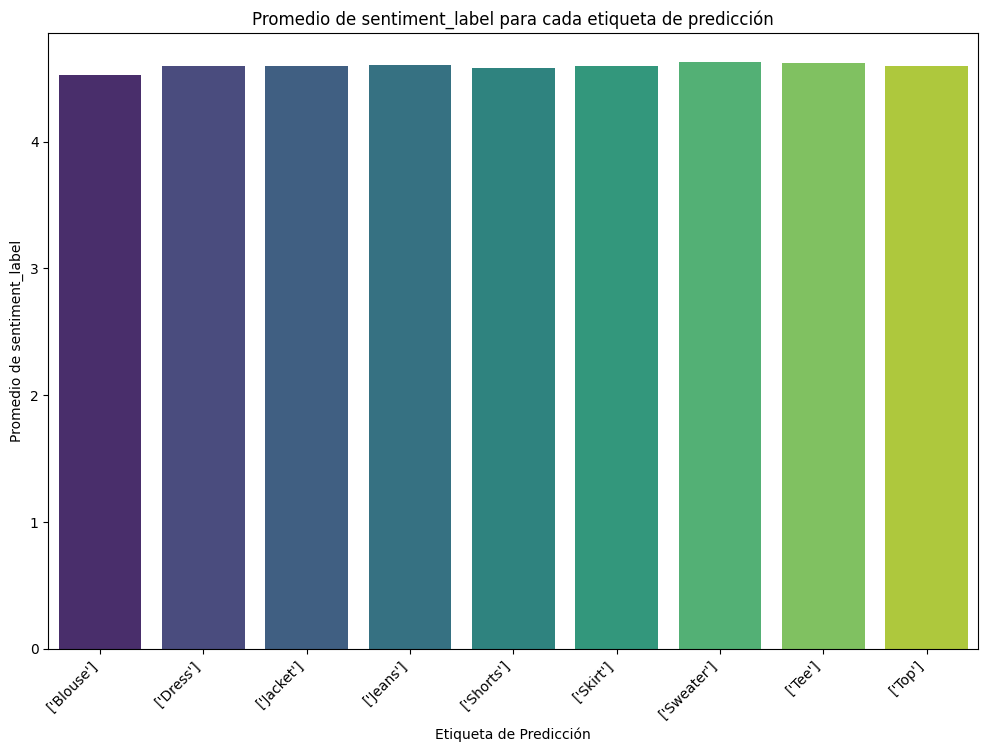

In [83]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# Lee el archivo CSV
df = pd.read_csv('FULL/anabelizam.csv')

# Convierte la columna 'prediccion' de cadena a lista
df['prediccion'] = df['prediccion'].apply(ast.literal_eval)

# Explota la columna 'prediccion' para que cada etiqueta tenga su propia fila
df_explotado = df.explode('prediccion')

# Convierte las etiquetas a una cadena
df_explotado['prediccion'] = df_explotado['prediccion'].apply(str)

# Crea un DataFrame con las etiquetas y los valores correspondientes de 'sentiment_label'
df_etiquetas = pd.DataFrame({'etiqueta': df_explotado['prediccion'], 'sentiment_label': df_explotado['sentiment_label'].tolist()})

# Calcula el promedio de 'sentiment_label' para cada etiqueta
promedio_por_etiqueta = df_etiquetas.groupby('etiqueta')['sentiment_label'].mean().reset_index()

# Grafica los resultados
plt.figure(figsize=(12, 8))
sns.barplot(data=promedio_por_etiqueta, x='etiqueta', y='sentiment_label', palette='viridis')
plt.title('Promedio de sentiment_label para cada etiqueta de predicción')
plt.xlabel('Etiqueta de Predicción')
plt.ylabel('Promedio de sentiment_label')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()


C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\659394707.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_likes_por_etiqueta, x='etiqueta', y='likes', palette='viridis')


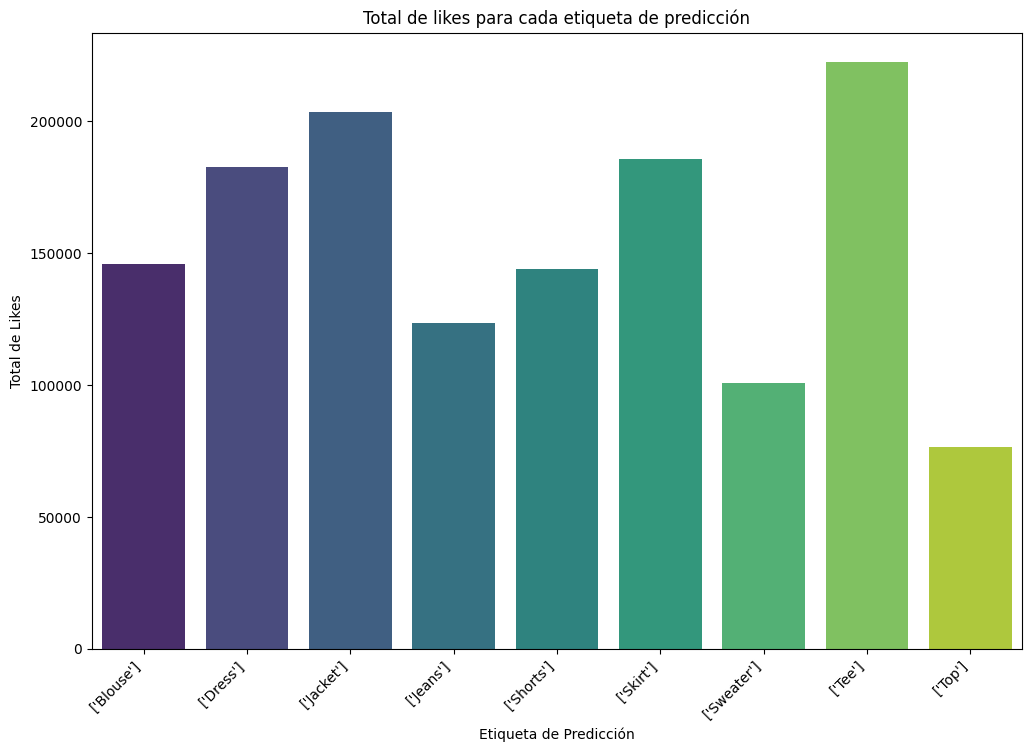

In [84]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# Lee el archivo CSV
df = pd.read_csv('FULL/anabelizam.csv')

# Convierte la columna 'prediccion' de cadena a lista
df['prediccion'] = df['prediccion'].apply(ast.literal_eval)

# Explota la columna 'prediccion' para que cada etiqueta tenga su propia fila
df_explotado = df.explode('prediccion')

# Convierte las etiquetas a una cadena
df_explotado['prediccion'] = df_explotado['prediccion'].apply(str)

# Crea un DataFrame con las etiquetas y los valores correspondientes de 'likes'
df_likes = pd.DataFrame({'etiqueta': df_explotado['prediccion'], 'likes': df_explotado['likes']})

# Calcula el total de likes para cada etiqueta
total_likes_por_etiqueta = df_likes.groupby('etiqueta')['likes'].sum().reset_index()

# Grafica los resultados
plt.figure(figsize=(12, 8))
sns.barplot(data=total_likes_por_etiqueta, x='etiqueta', y='likes', palette='viridis')
plt.title('Total de likes para cada etiqueta de predicción')
plt.xlabel('Etiqueta de Predicción')
plt.ylabel('Total de Likes')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()


C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\2085017261.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_comments_por_etiqueta, x='etiqueta', y='comments', palette='viridis')


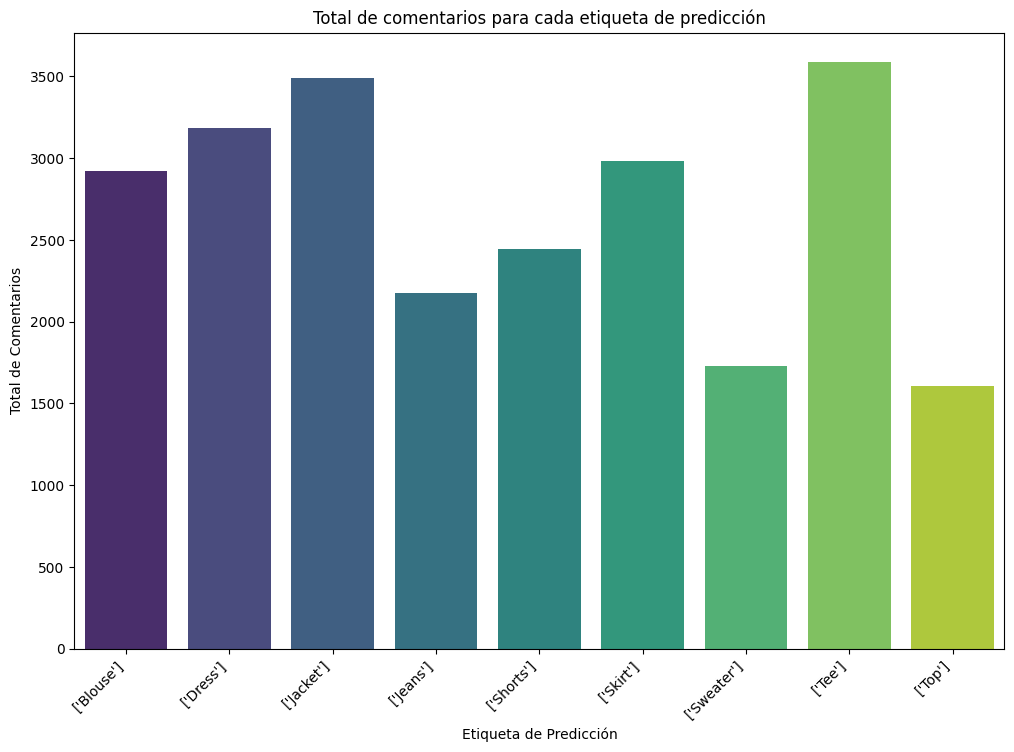

In [85]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# Lee el archivo CSV
df = pd.read_csv('FULL/anabelizam.csv')

# Convierte la columna 'prediccion' de cadena a lista
df['prediccion'] = df['prediccion'].apply(ast.literal_eval)

# Explota la columna 'prediccion' para que cada etiqueta tenga su propia fila
df_explotado = df.explode('prediccion')

# Convierte las etiquetas a una cadena
df_explotado['prediccion'] = df_explotado['prediccion'].apply(str)

# Crea un DataFrame con las etiquetas y los valores correspondientes de 'comments'
df_comments = pd.DataFrame({'etiqueta': df_explotado['prediccion'], 'comments': df_explotado['comments']})

# Calcula el total de comentarios para cada etiqueta
total_comments_por_etiqueta = df_comments.groupby('etiqueta')['comments'].sum().reset_index()

# Grafica los resultados
plt.figure(figsize=(12, 8))
sns.barplot(data=total_comments_por_etiqueta, x='etiqueta', y='comments', palette='viridis')
plt.title('Total de comentarios para cada etiqueta de predicción')
plt.xlabel('Etiqueta de Predicción')
plt.ylabel('Total de Comentarios')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()


C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\3302362676.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_likes_por_etiqueta, x='etiqueta', y='likes', palette='viridis')
C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\3302362676.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_comments_por_etiqueta, x='etiqueta', y='comments', palette='viridis')


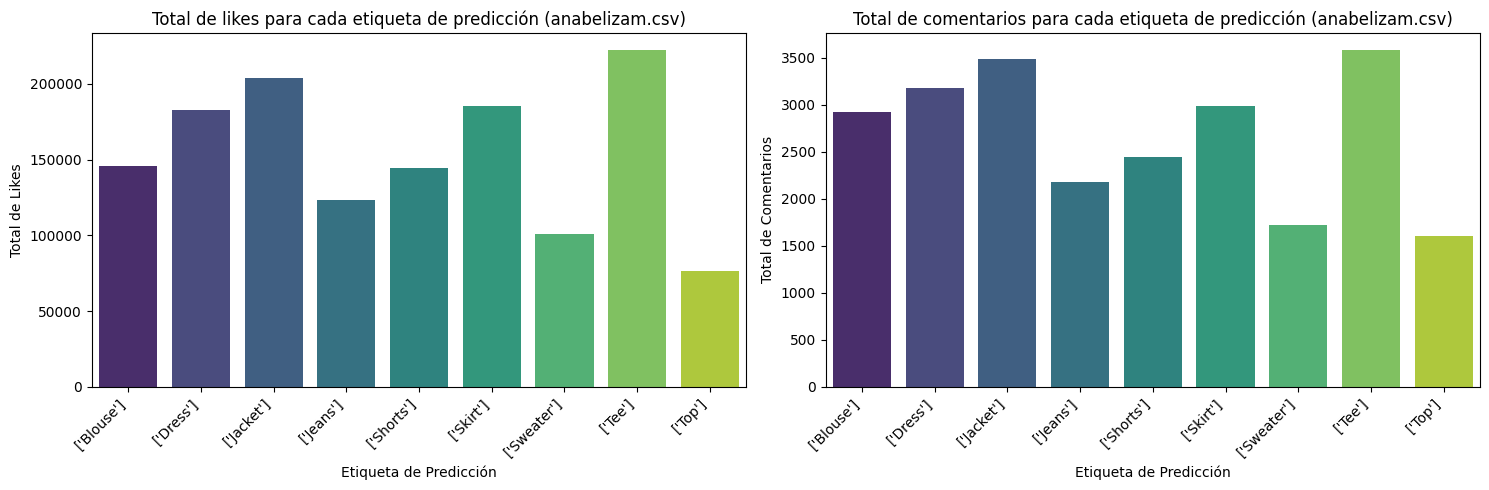

C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\3302362676.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_likes_por_etiqueta, x='etiqueta', y='likes', palette='viridis')
C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\3302362676.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_comments_por_etiqueta, x='etiqueta', y='comments', palette='viridis')


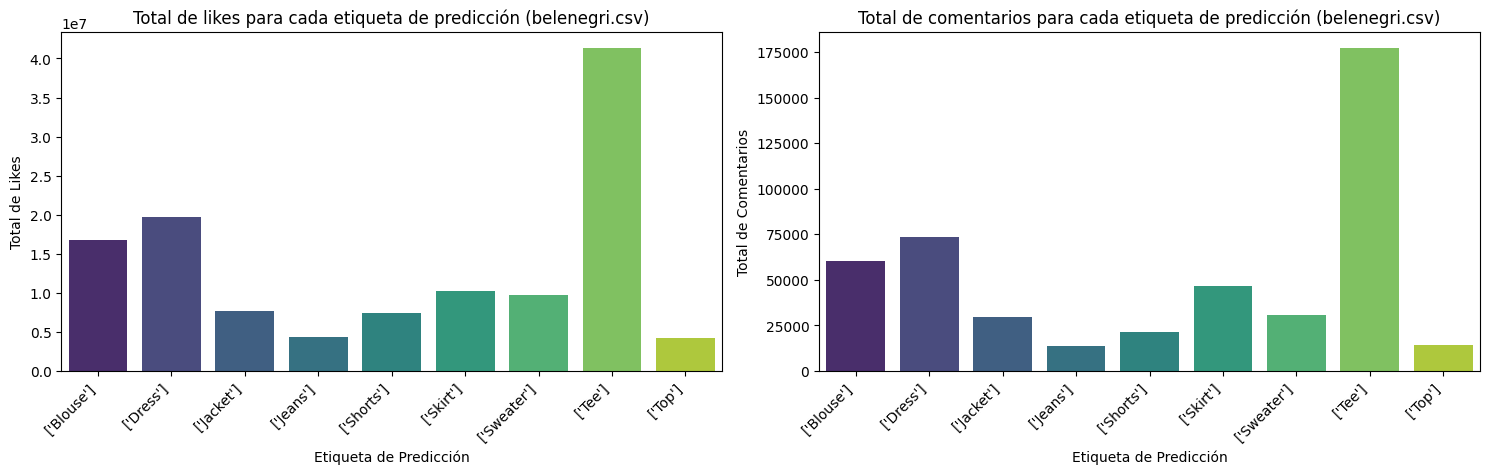

C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\3302362676.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_likes_por_etiqueta, x='etiqueta', y='likes', palette='viridis')
C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\3302362676.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_comments_por_etiqueta, x='etiqueta', y='comments', palette='viridis')


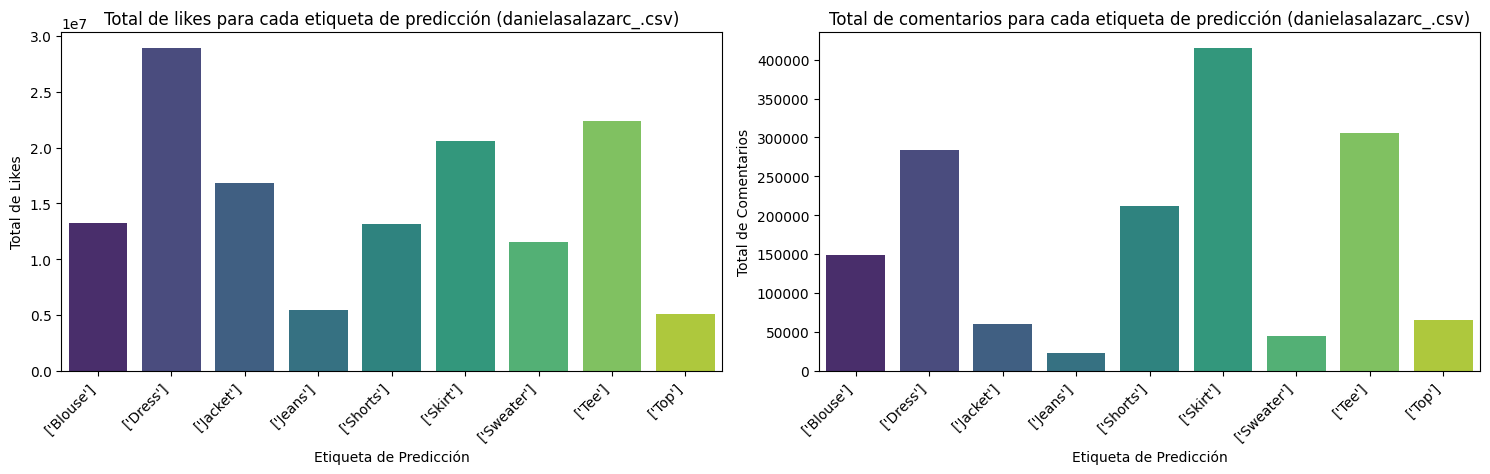

C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\3302362676.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_likes_por_etiqueta, x='etiqueta', y='likes', palette='viridis')
C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\3302362676.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_comments_por_etiqueta, x='etiqueta', y='comments', palette='viridis')


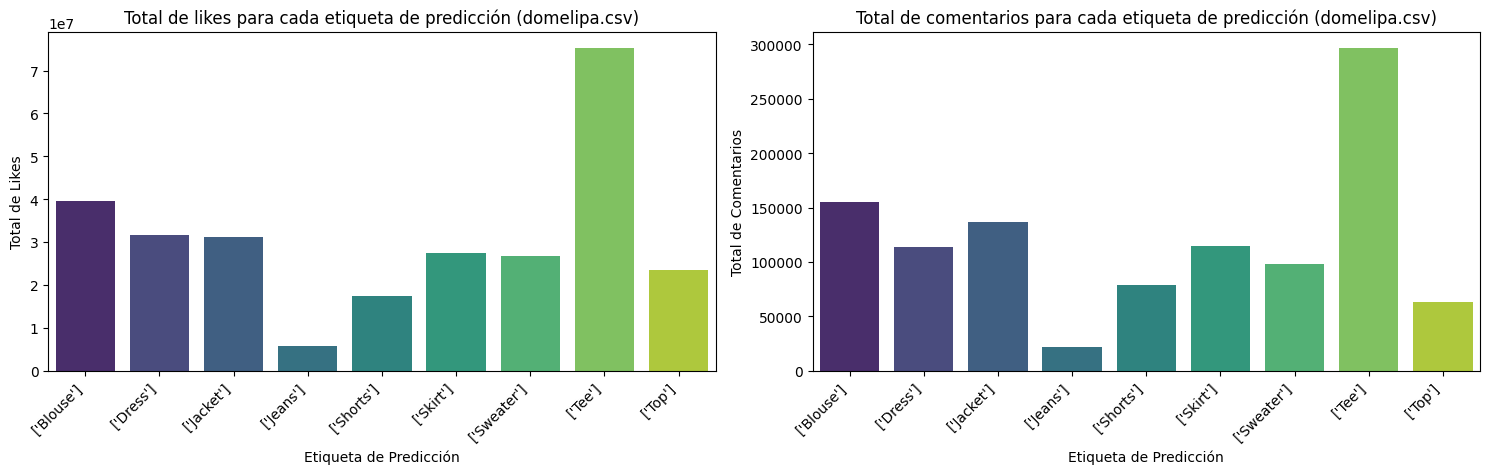

C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\3302362676.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_likes_por_etiqueta, x='etiqueta', y='likes', palette='viridis')
C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\3302362676.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_comments_por_etiqueta, x='etiqueta', y='comments', palette='viridis')


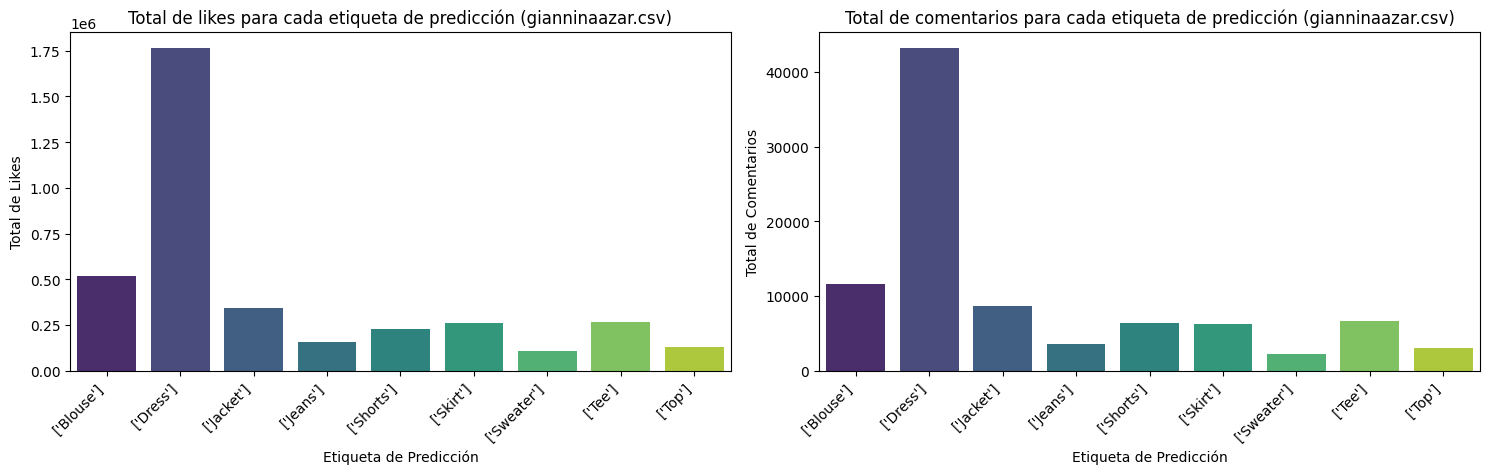

C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\3302362676.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_likes_por_etiqueta, x='etiqueta', y='likes', palette='viridis')
C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\3302362676.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_comments_por_etiqueta, x='etiqueta', y='comments', palette='viridis')


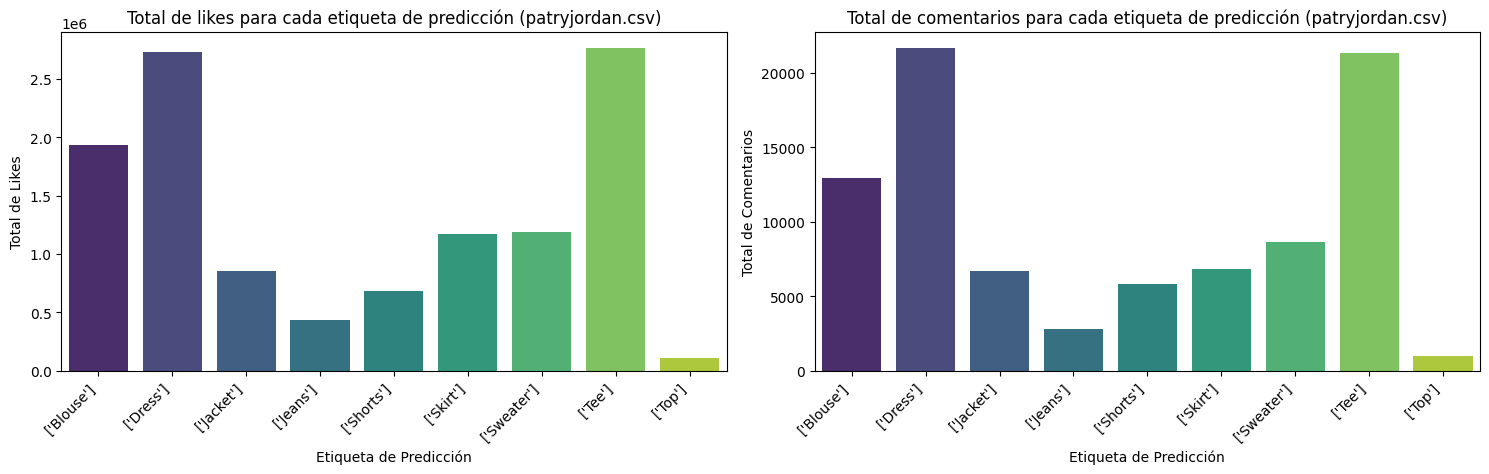

C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\3302362676.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_likes_por_etiqueta, x='etiqueta', y='likes', palette='viridis')
C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\3302362676.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_comments_por_etiqueta, x='etiqueta', y='comments', palette='viridis')


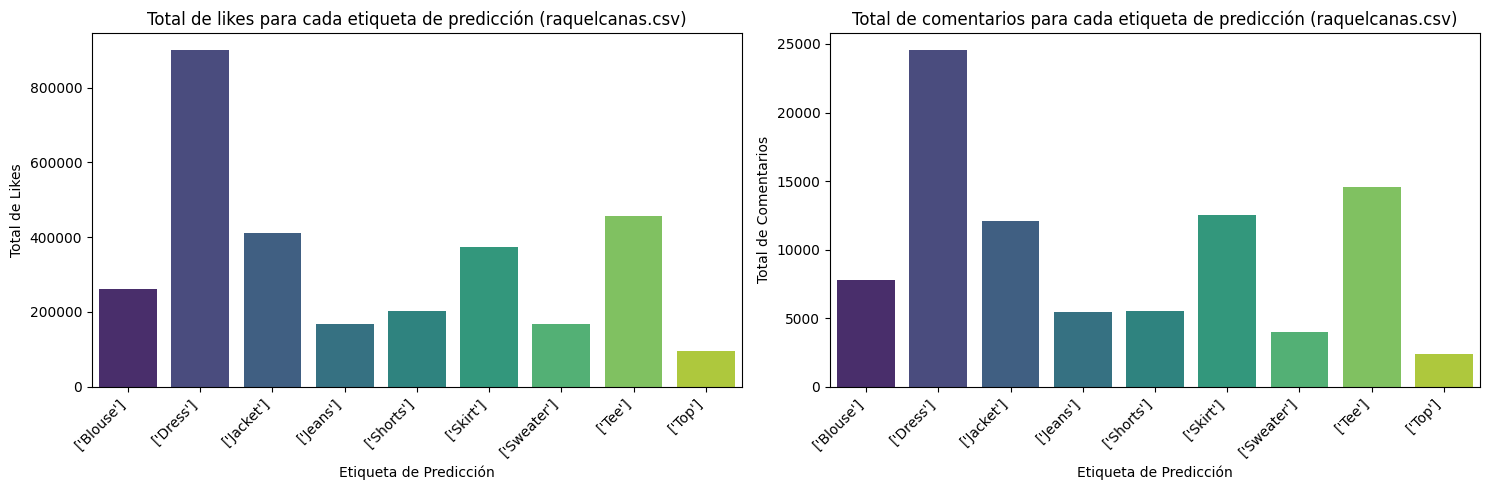

C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\3302362676.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_likes_por_etiqueta, x='etiqueta', y='likes', palette='viridis')
C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\3302362676.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_comments_por_etiqueta, x='etiqueta', y='comments', palette='viridis')


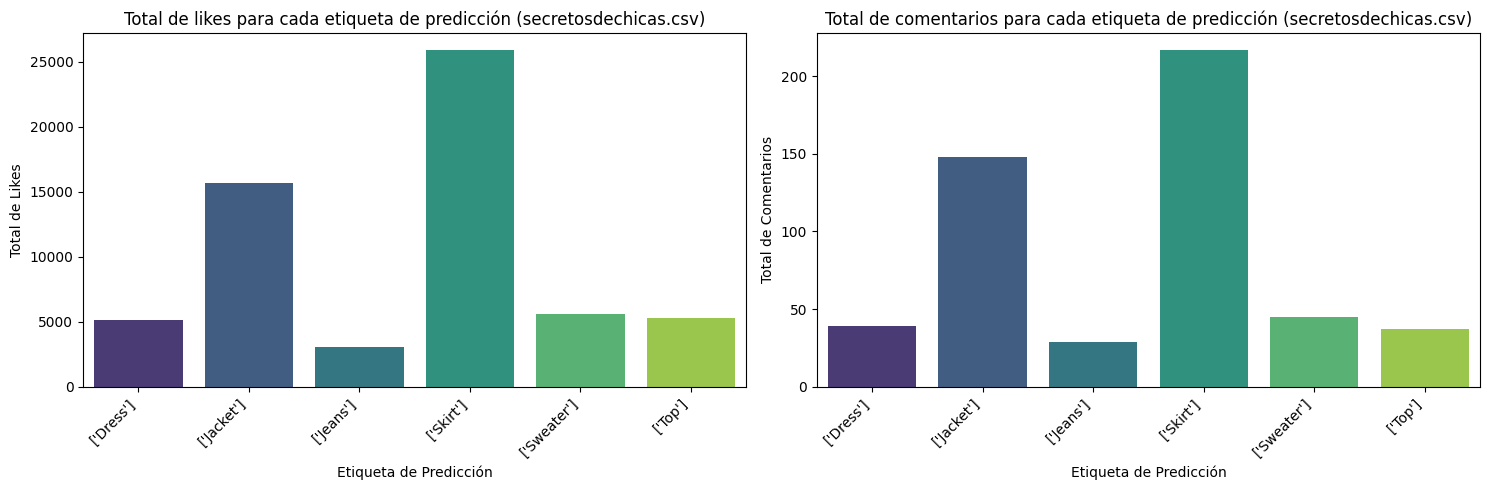

C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\3302362676.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_likes_por_etiqueta, x='etiqueta', y='likes', palette='viridis')
C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\3302362676.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_comments_por_etiqueta, x='etiqueta', y='comments', palette='viridis')


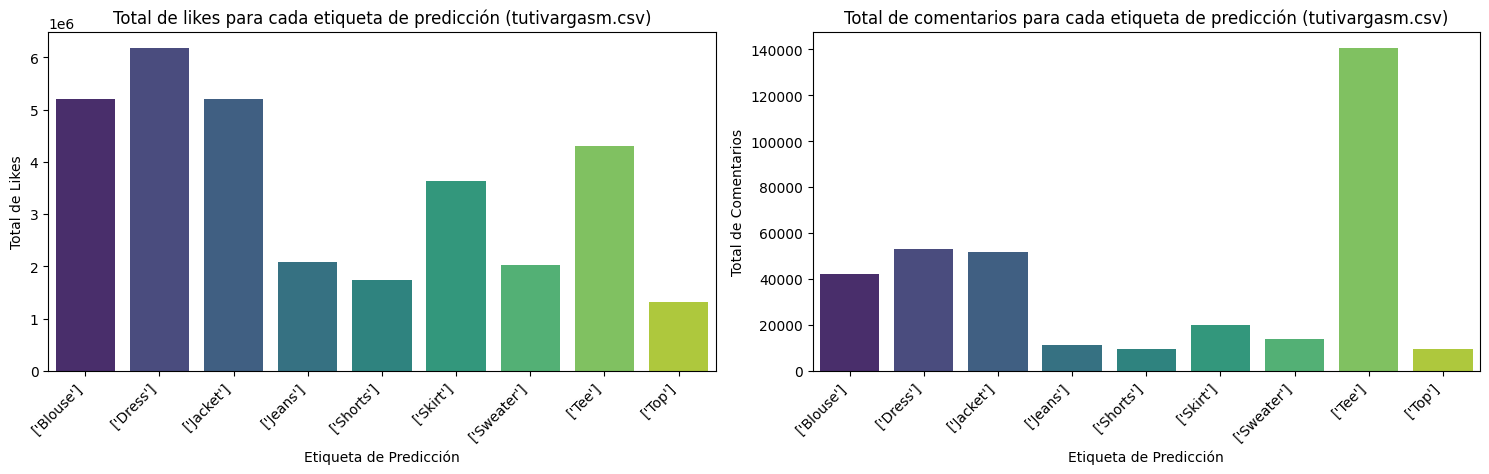

In [86]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Obtén la lista de archivos CSV en el directorio 'FULL'
directory = 'FULL'
csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

# Función para generar los gráficos
def generar_graficos(csv_file):
    # Lee el archivo CSV
    df = pd.read_csv(os.path.join(directory, csv_file))

    # Convierte la columna 'prediccion' de cadena a lista
    df['prediccion'] = df['prediccion'].apply(ast.literal_eval)

    # Explota la columna 'prediccion' para que cada etiqueta tenga su propia fila
    df_explotado = df.explode('prediccion')

    # Convierte las etiquetas a una cadena
    df_explotado['prediccion'] = df_explotado['prediccion'].apply(str)

    # Crea un DataFrame con las etiquetas y los valores correspondientes de 'likes' y 'comments'
    df_likes = pd.DataFrame({'etiqueta': df_explotado['prediccion'], 'likes': df_explotado['likes']})
    df_comments = pd.DataFrame({'etiqueta': df_explotado['prediccion'], 'comments': df_explotado['comments']})

    # Calcula el total de likes y comentarios para cada etiqueta
    total_likes_por_etiqueta = df_likes.groupby('etiqueta')['likes'].sum().reset_index()
    total_comments_por_etiqueta = df_comments.groupby('etiqueta')['comments'].sum().reset_index()

    # Grafica los resultados
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    sns.barplot(data=total_likes_por_etiqueta, x='etiqueta', y='likes', palette='viridis')
    plt.title(f'Total de likes para cada etiqueta de predicción ({csv_file})')
    plt.xlabel('Etiqueta de Predicción')
    plt.ylabel('Total de Likes')
    plt.xticks(rotation=45, ha='right')

    plt.subplot(1, 2, 2)
    sns.barplot(data=total_comments_por_etiqueta, x='etiqueta', y='comments', palette='viridis')
    plt.title(f'Total de comentarios para cada etiqueta de predicción ({csv_file})')
    plt.xlabel('Etiqueta de Predicción')
    plt.ylabel('Total de Comentarios')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

# Genera los gráficos para cada archivo CSV
for csv_file in csv_files:
    generar_graficos(csv_file)


C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\4082517167.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promedio_por_etiqueta, x='etiqueta', y='sentiment_label', palette='viridis')
C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\4082517167.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_likes_por_etiqueta, x='etiqueta', y='likes', palette='viridis')
C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\4082517167.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_comments_por_etiqueta, x='etiqueta', 

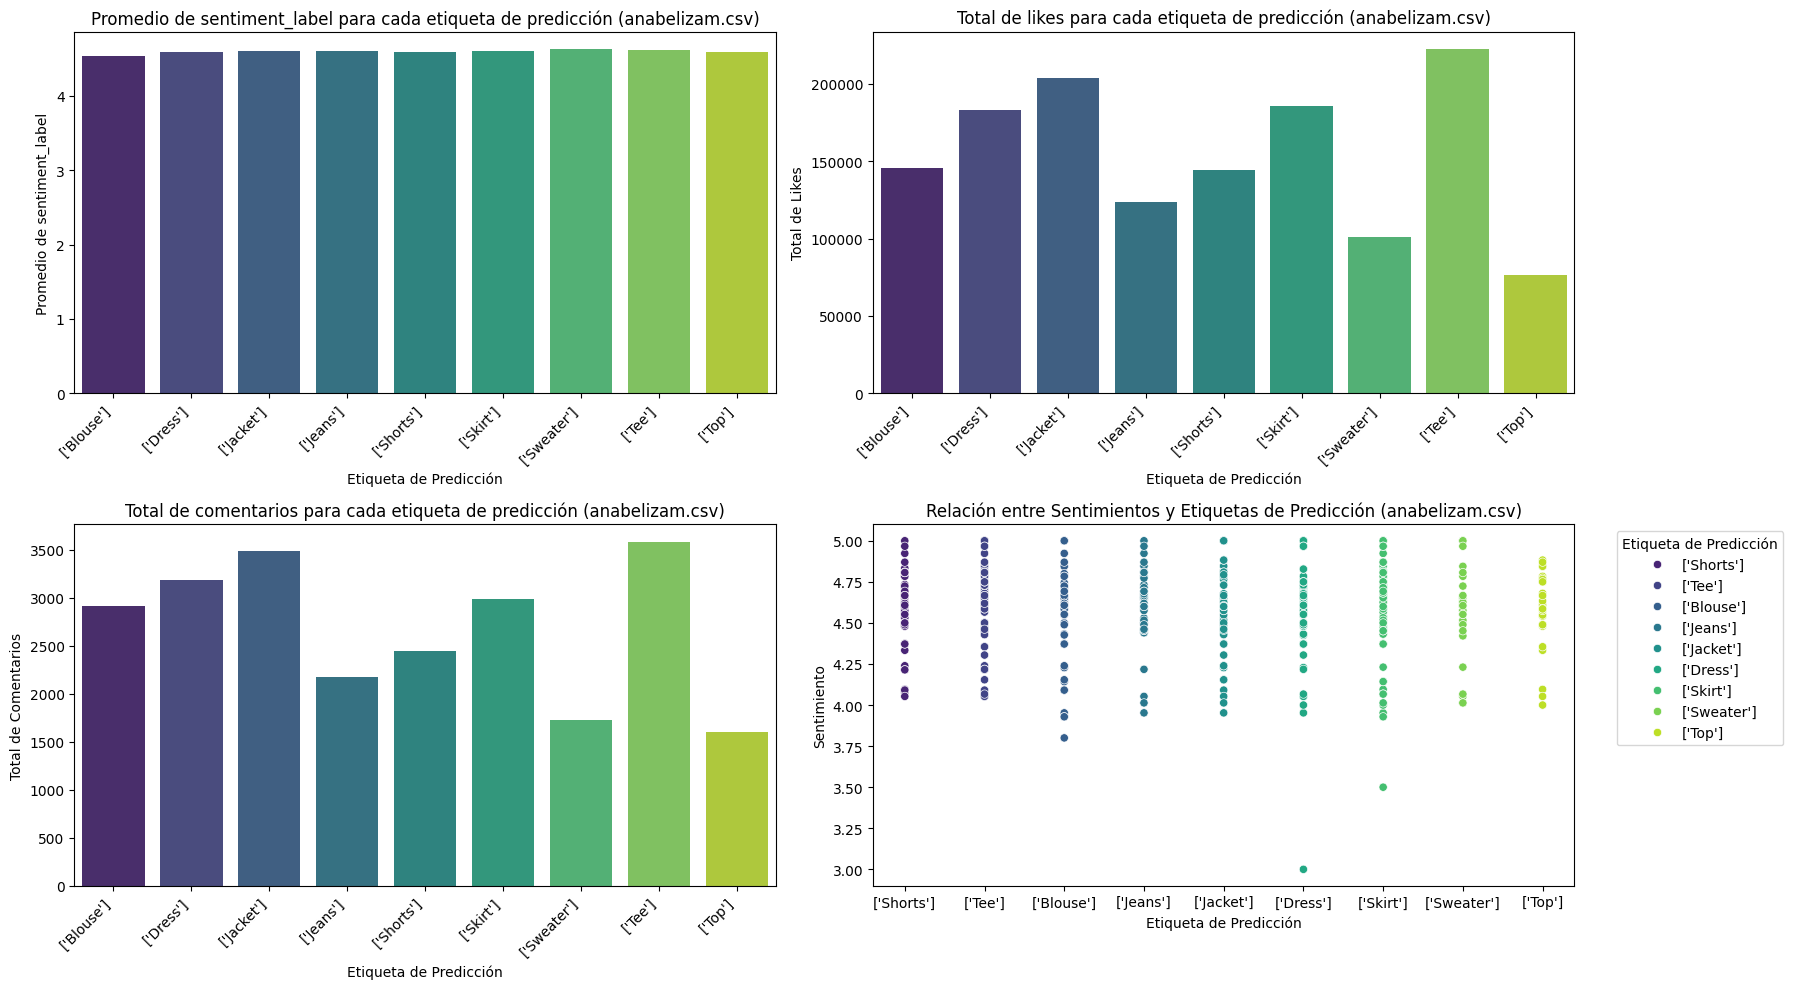

C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\4082517167.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promedio_por_etiqueta, x='etiqueta', y='sentiment_label', palette='viridis')
C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\4082517167.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_likes_por_etiqueta, x='etiqueta', y='likes', palette='viridis')
C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\4082517167.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_comments_por_etiqueta, x='etiqueta', 

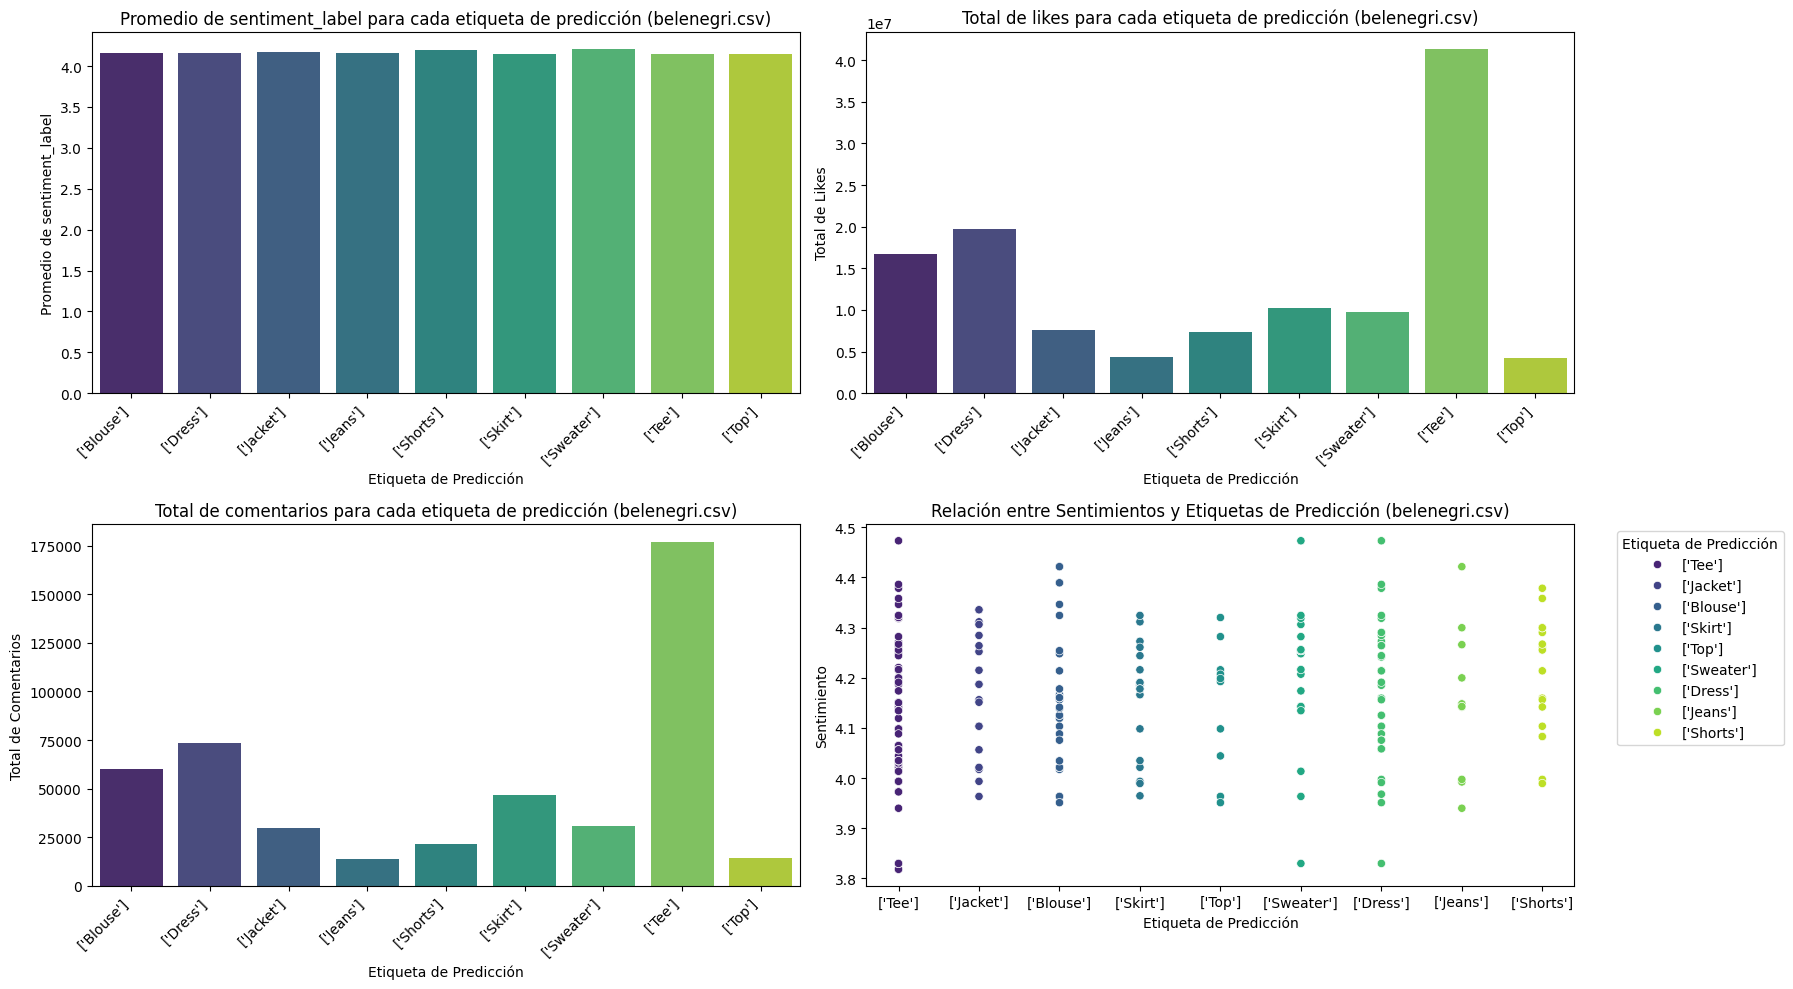

C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\4082517167.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promedio_por_etiqueta, x='etiqueta', y='sentiment_label', palette='viridis')
C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\4082517167.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_likes_por_etiqueta, x='etiqueta', y='likes', palette='viridis')
C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\4082517167.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_comments_por_etiqueta, x='etiqueta', 

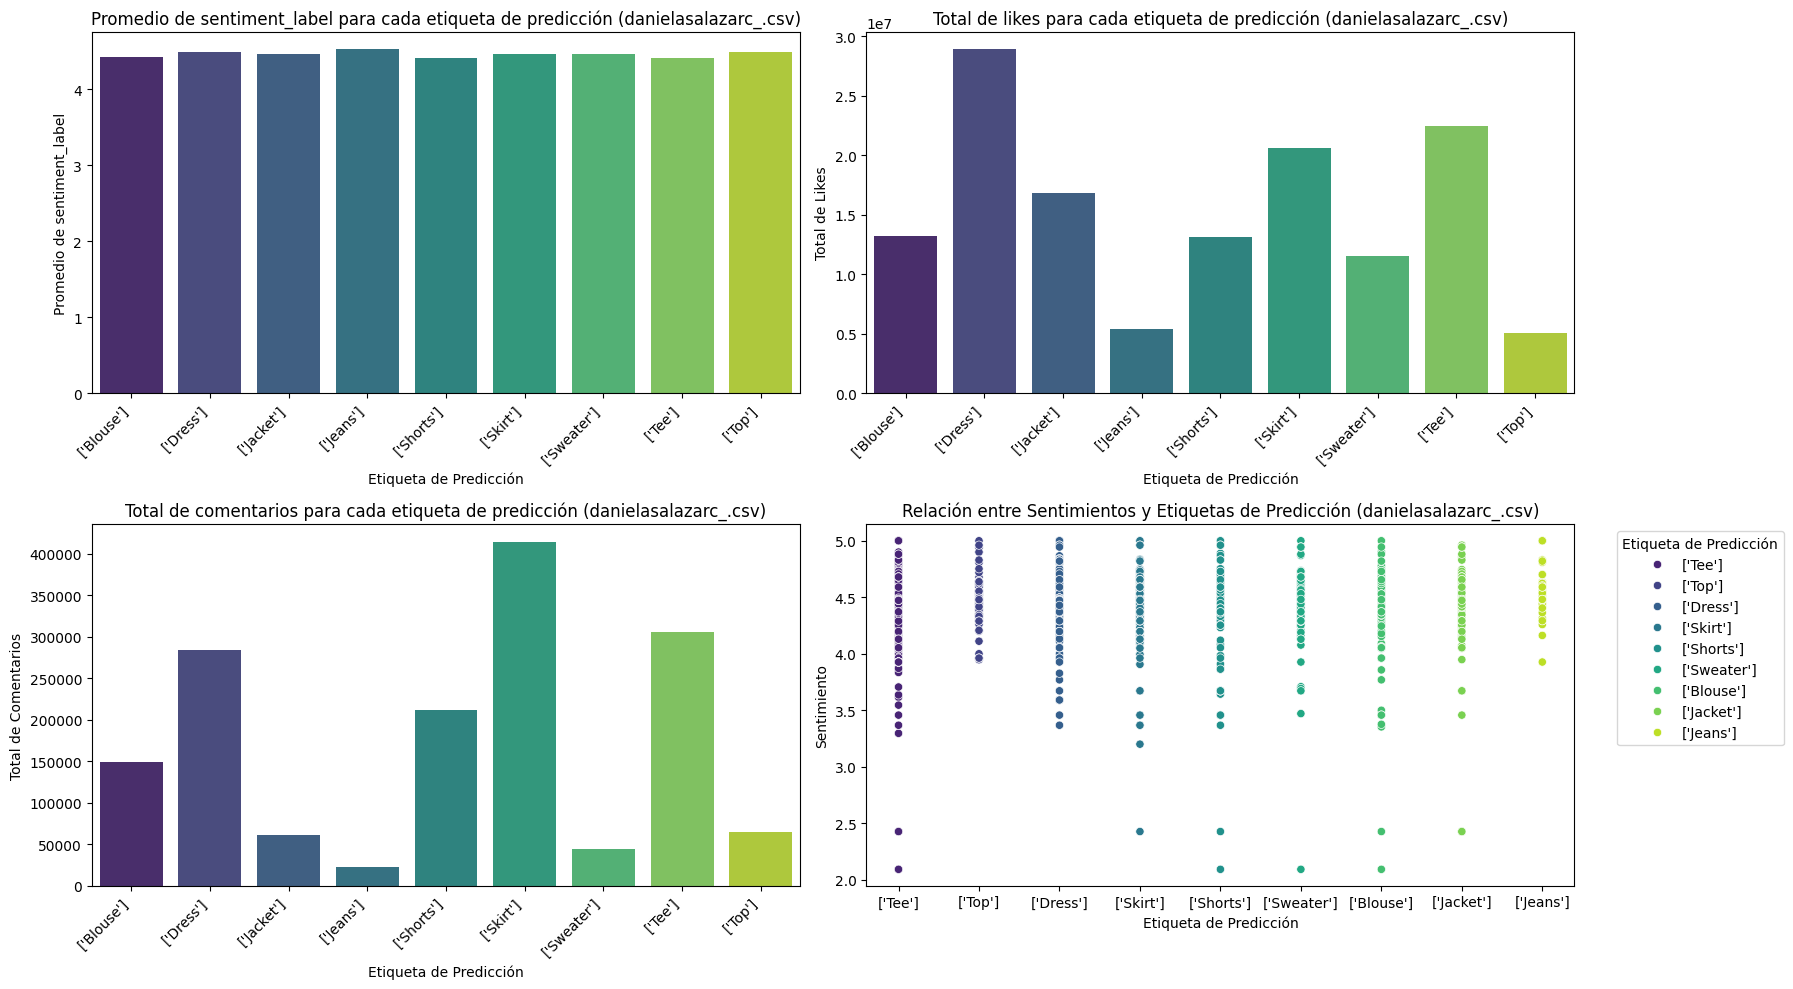

C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\4082517167.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promedio_por_etiqueta, x='etiqueta', y='sentiment_label', palette='viridis')
C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\4082517167.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_likes_por_etiqueta, x='etiqueta', y='likes', palette='viridis')
C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\4082517167.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_comments_por_etiqueta, x='etiqueta', 

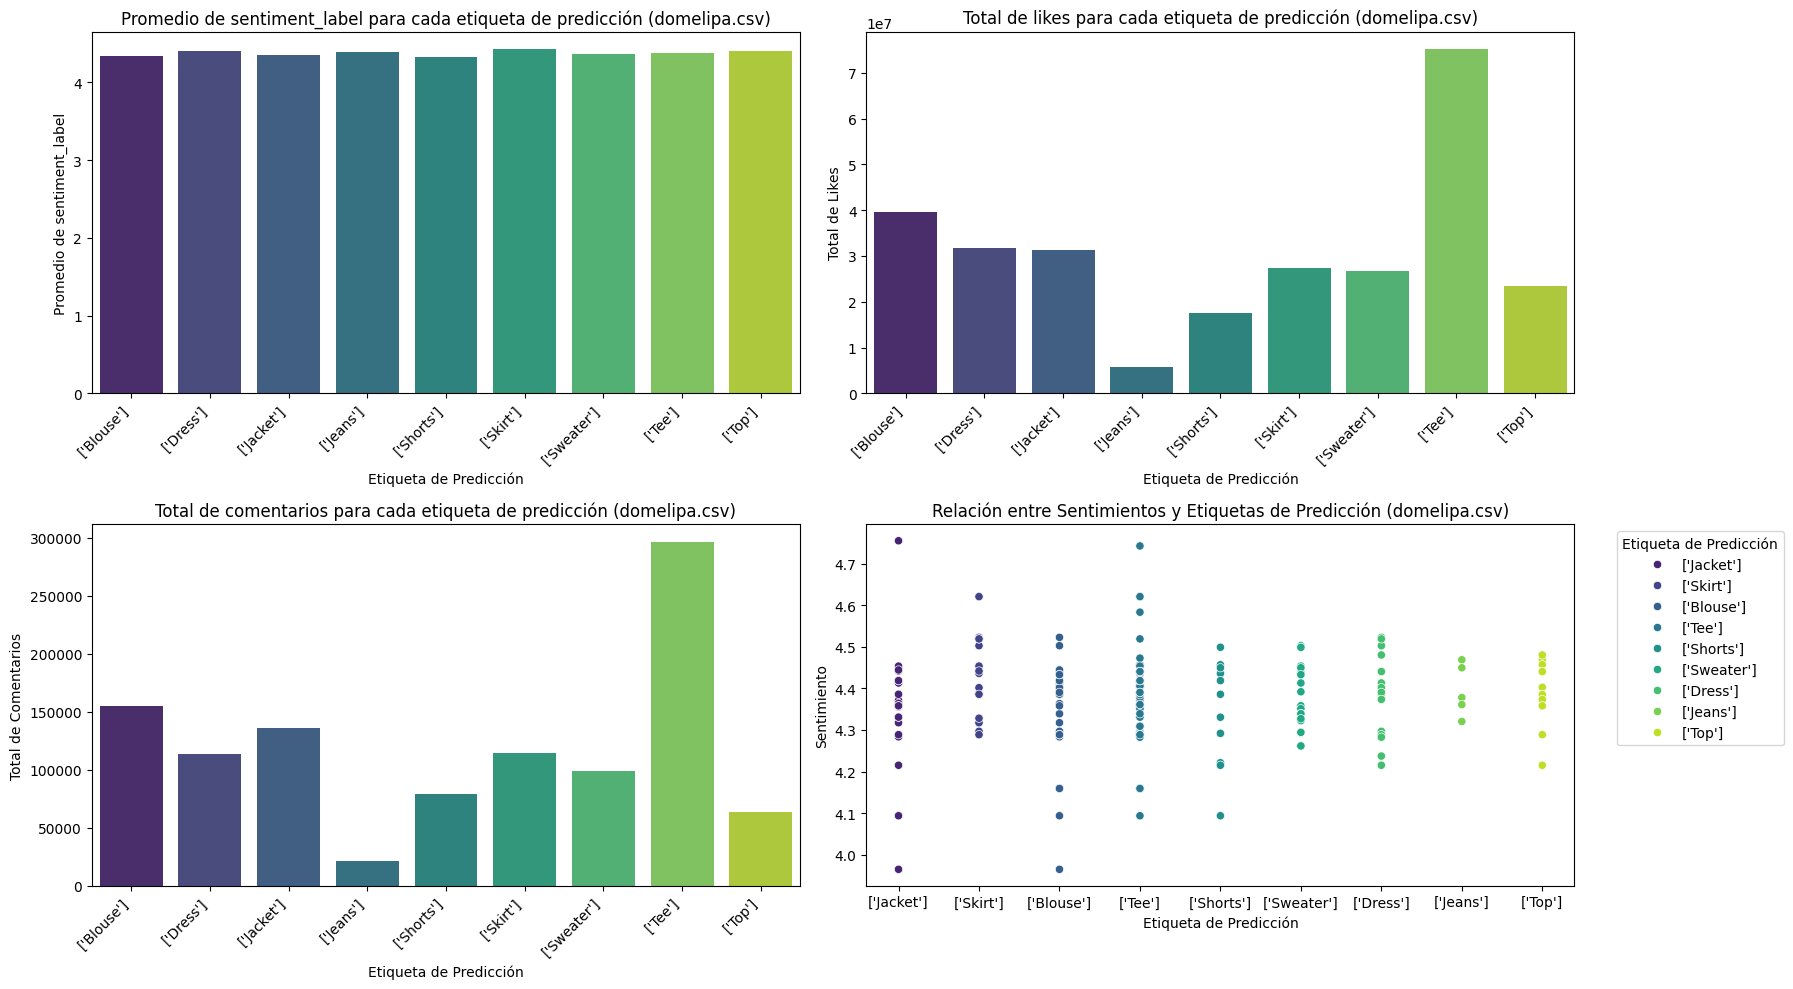

C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\4082517167.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promedio_por_etiqueta, x='etiqueta', y='sentiment_label', palette='viridis')
C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\4082517167.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_likes_por_etiqueta, x='etiqueta', y='likes', palette='viridis')
C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\4082517167.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_comments_por_etiqueta, x='etiqueta', 

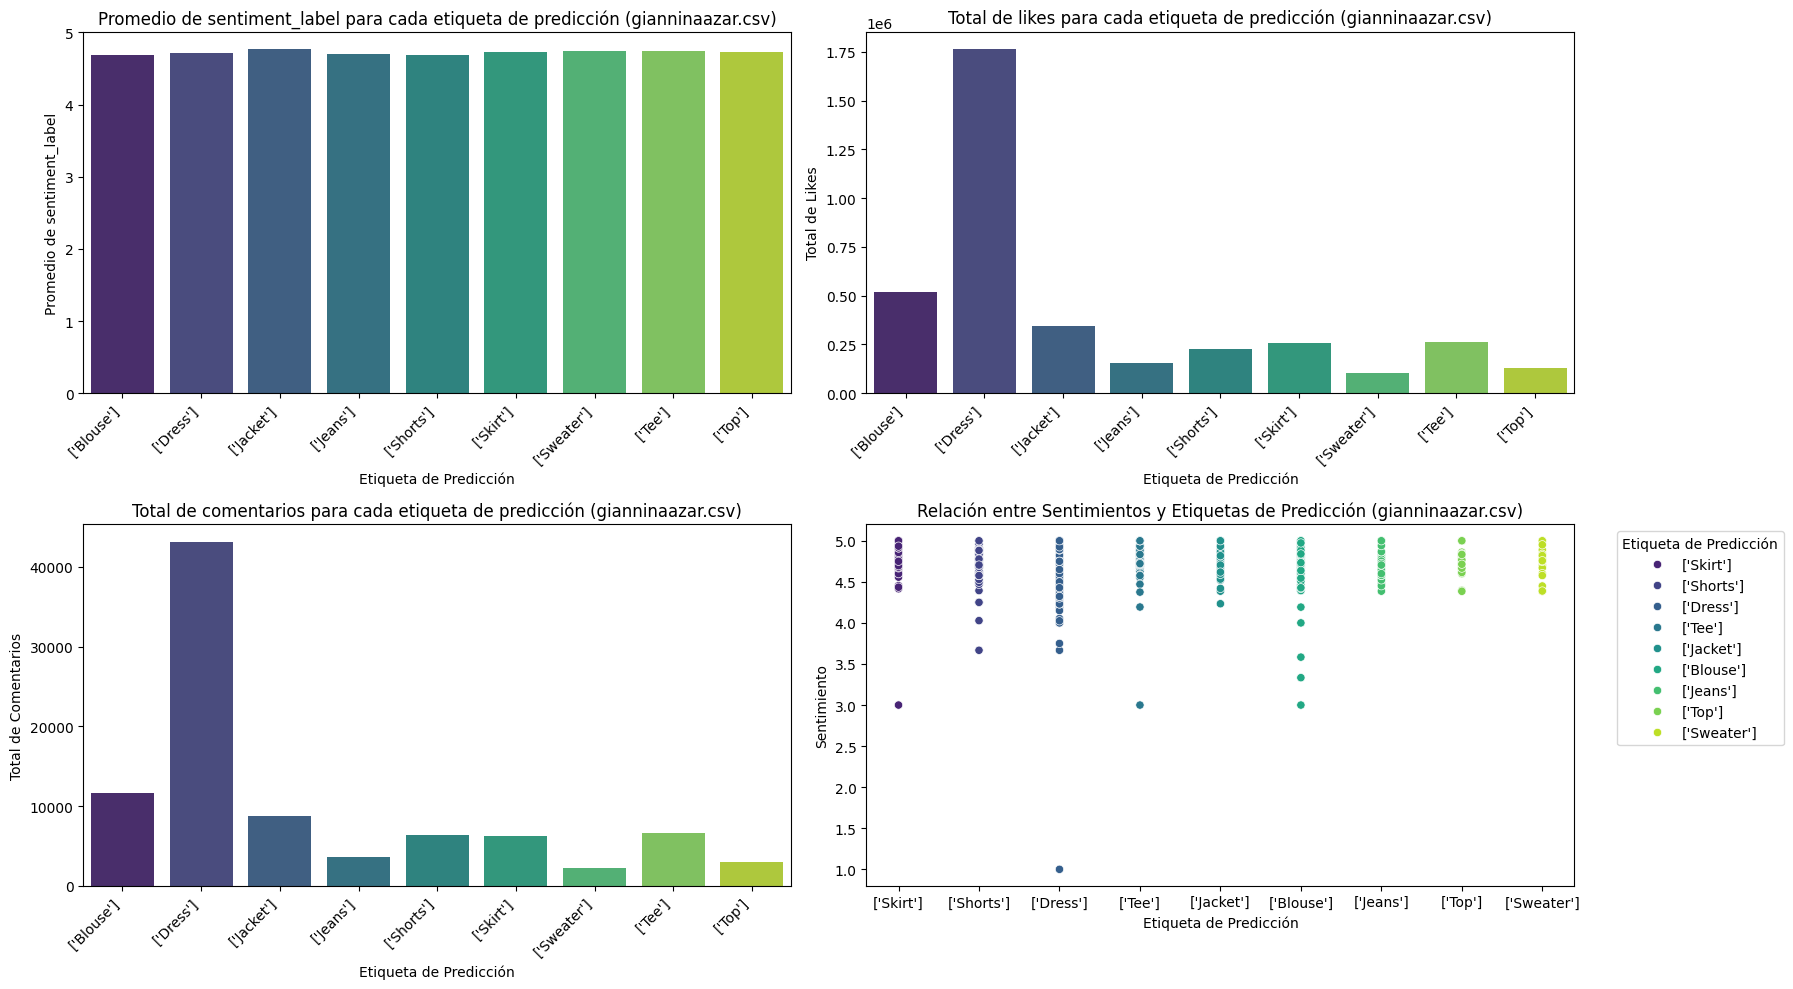

C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\4082517167.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promedio_por_etiqueta, x='etiqueta', y='sentiment_label', palette='viridis')
C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\4082517167.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_likes_por_etiqueta, x='etiqueta', y='likes', palette='viridis')
C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\4082517167.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_comments_por_etiqueta, x='etiqueta', 

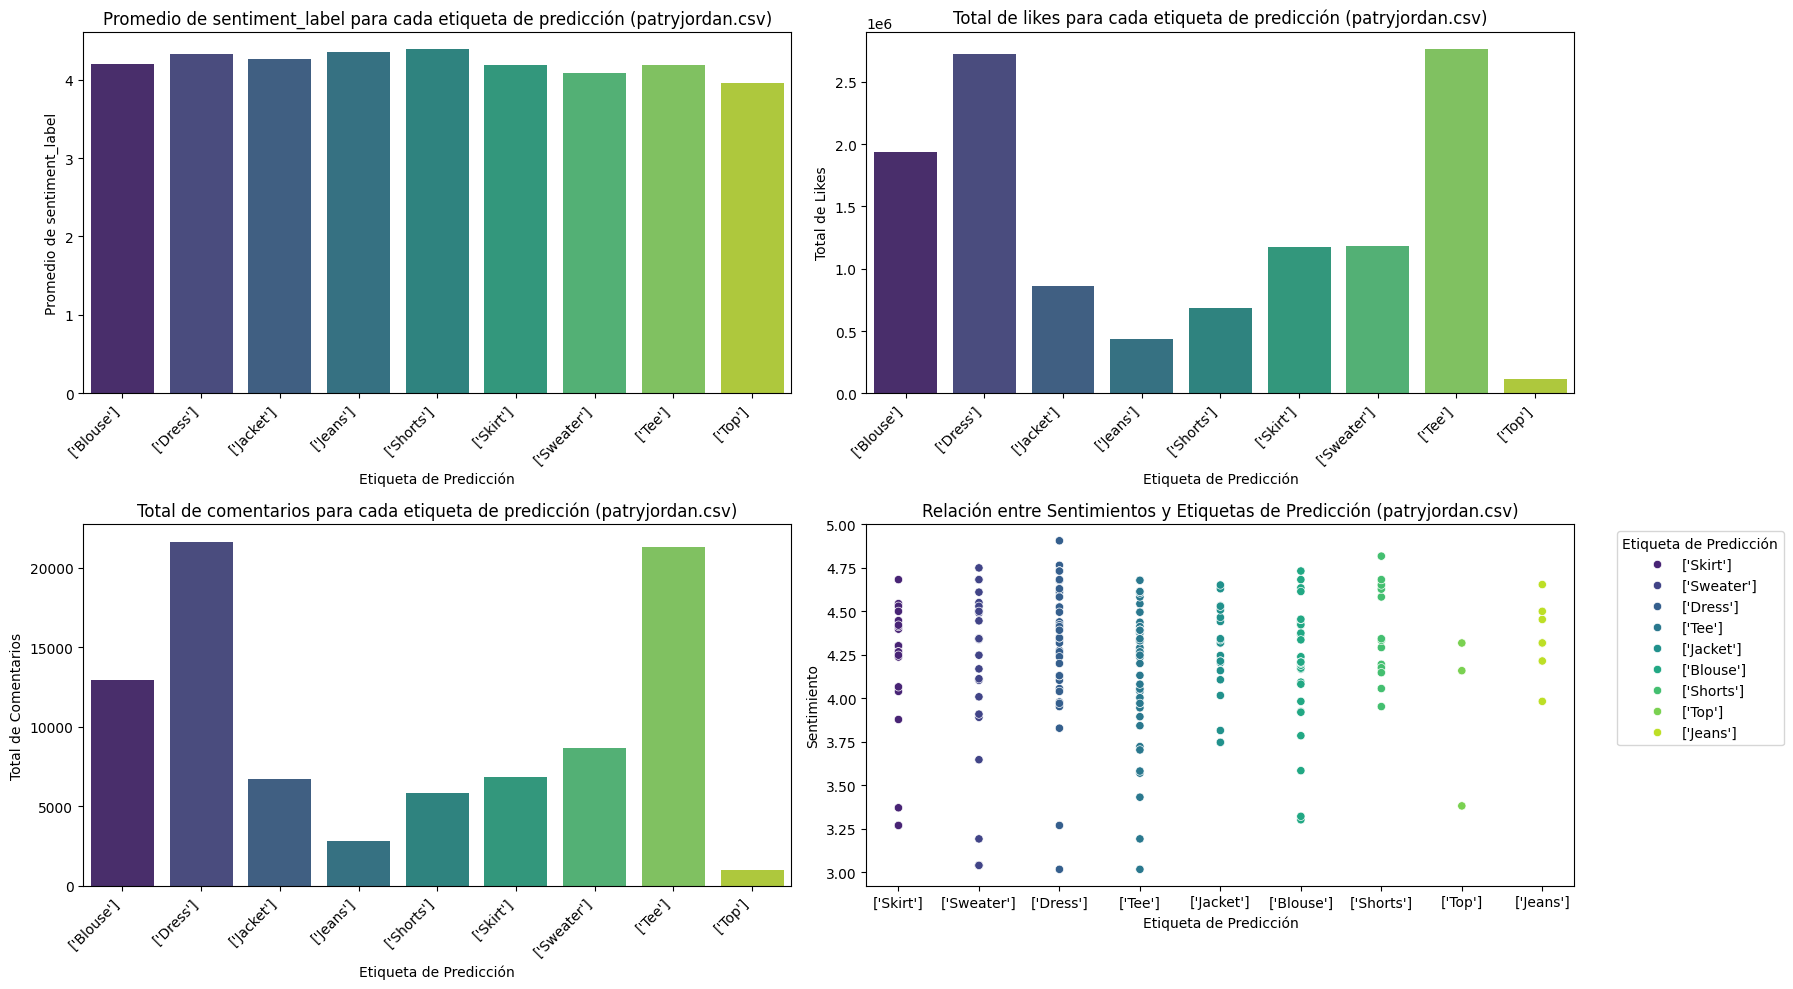

C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\4082517167.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promedio_por_etiqueta, x='etiqueta', y='sentiment_label', palette='viridis')
C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\4082517167.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_likes_por_etiqueta, x='etiqueta', y='likes', palette='viridis')
C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\4082517167.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_comments_por_etiqueta, x='etiqueta', 

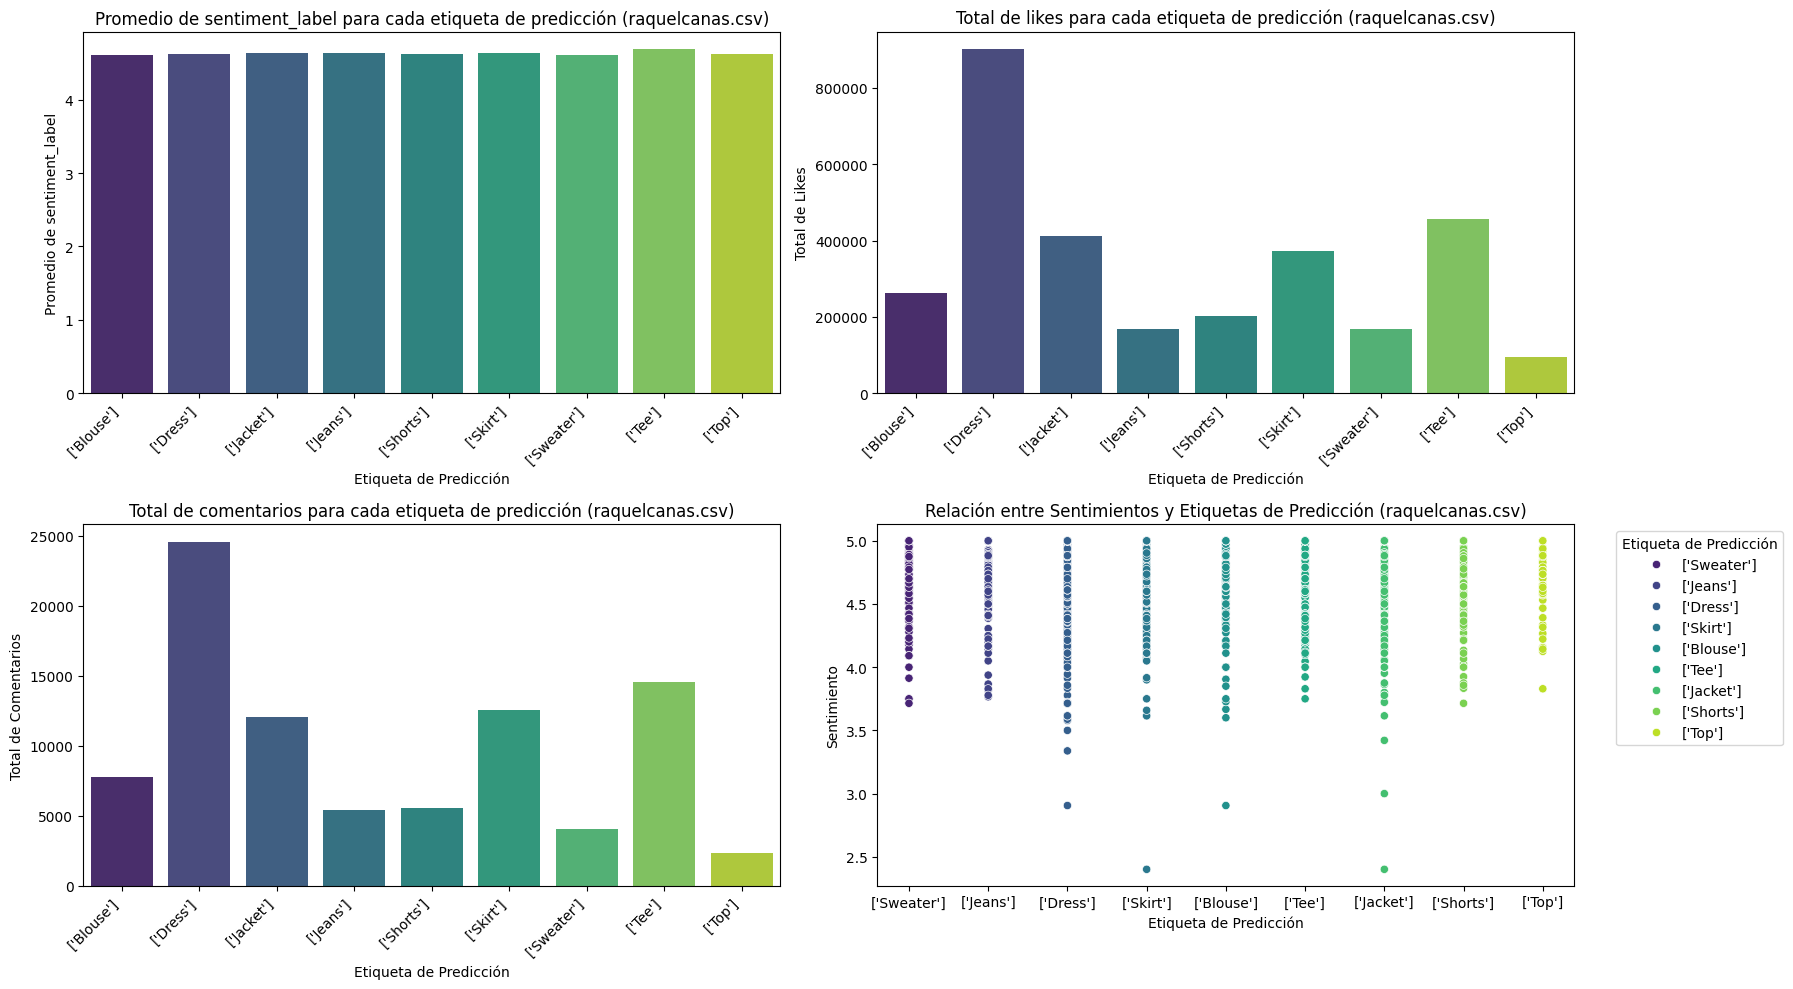

C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\4082517167.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promedio_por_etiqueta, x='etiqueta', y='sentiment_label', palette='viridis')
C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\4082517167.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_likes_por_etiqueta, x='etiqueta', y='likes', palette='viridis')
C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\4082517167.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_comments_por_etiqueta, x='etiqueta', 

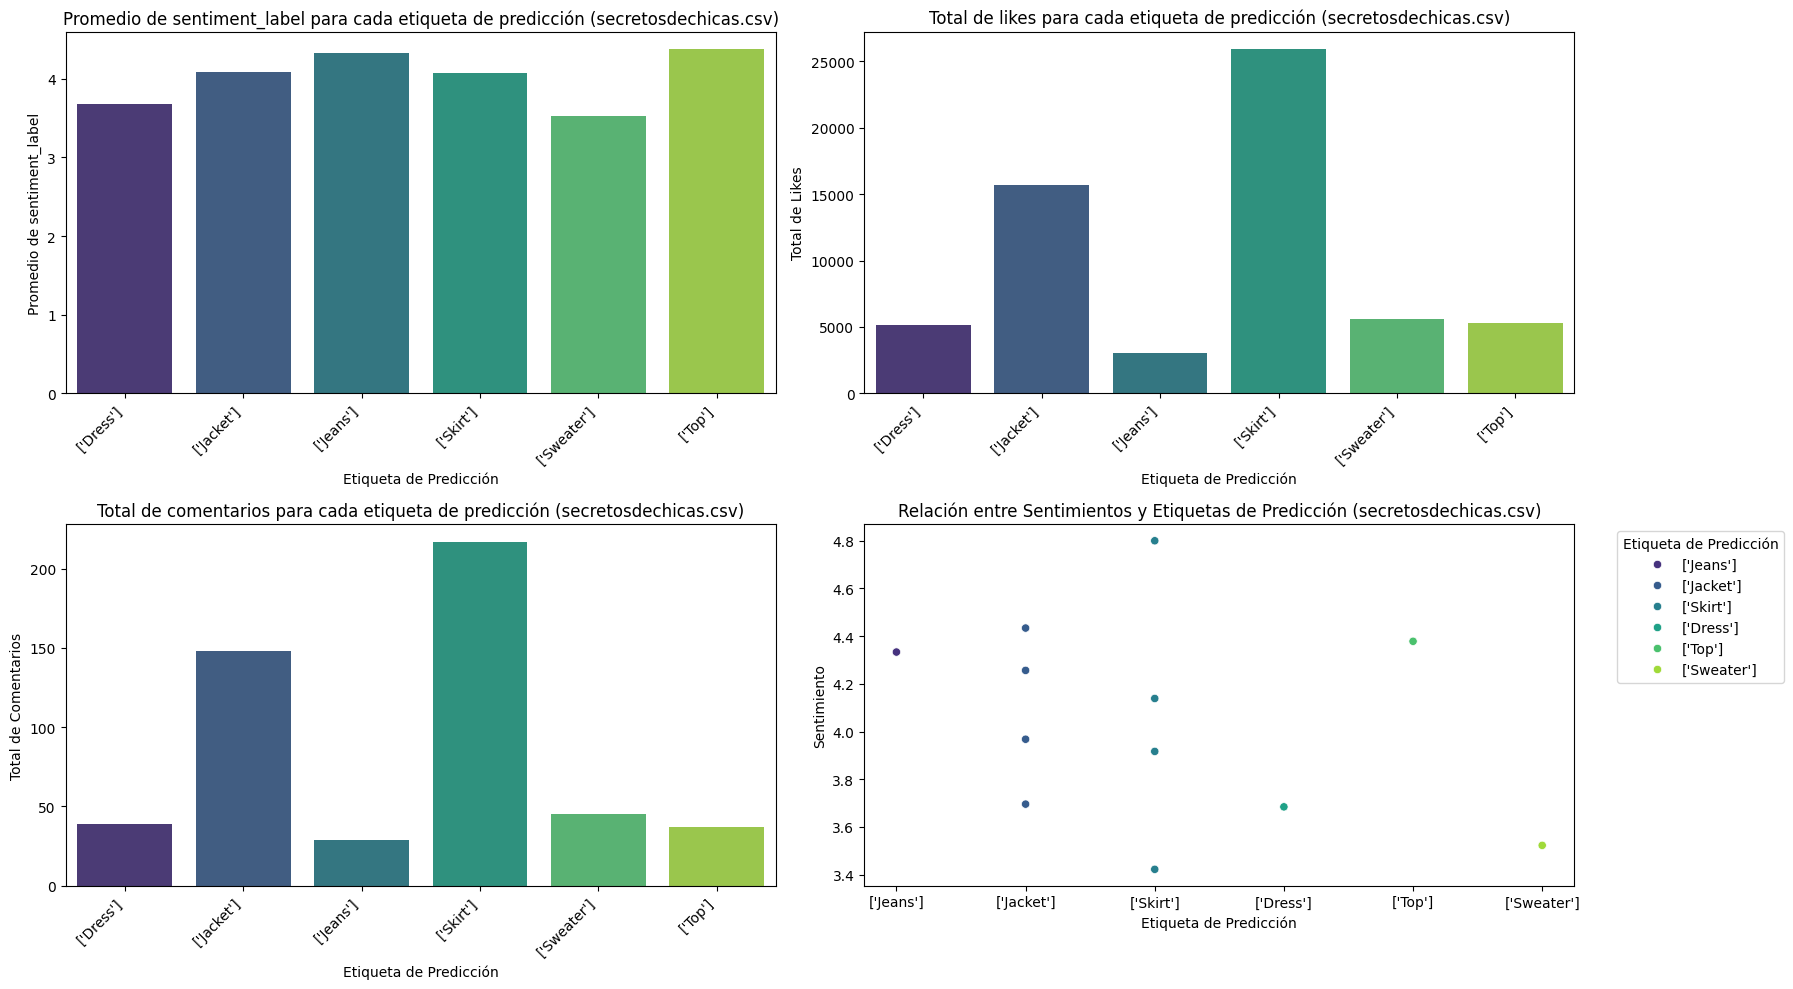

C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\4082517167.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promedio_por_etiqueta, x='etiqueta', y='sentiment_label', palette='viridis')
C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\4082517167.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_likes_por_etiqueta, x='etiqueta', y='likes', palette='viridis')
C:\Users\samuel\AppData\Local\Temp\ipykernel_9844\4082517167.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_comments_por_etiqueta, x='etiqueta', 

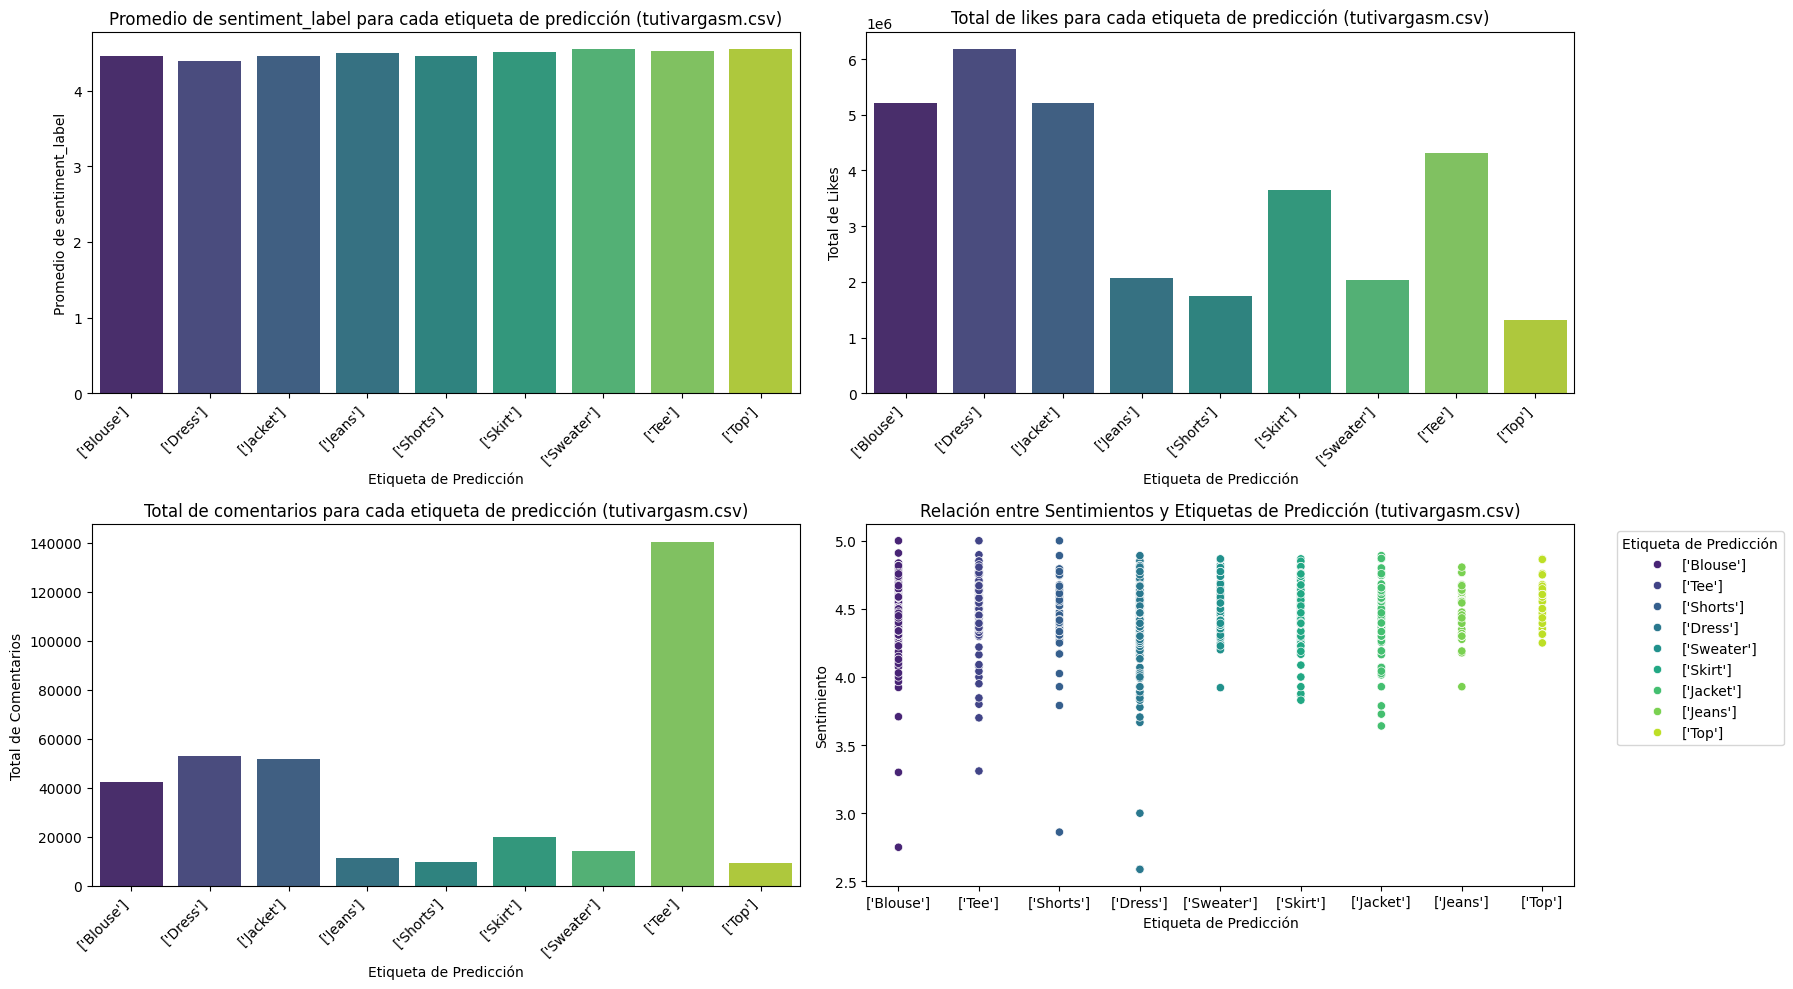

In [87]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Obtén la lista de archivos CSV en el directorio 'FULL'
directory = 'FULL'
csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

# Función para generar los gráficos
def generar_graficos(csv_file):
    # Lee el archivo CSV
    df = pd.read_csv(os.path.join(directory, csv_file))

    # Convierte la columna 'prediccion' de cadena a lista
    df['prediccion'] = df['prediccion'].apply(ast.literal_eval)

    # Explota la columna 'prediccion' para que cada etiqueta tenga su propia fila
    df_explotado = df.explode('prediccion')

    # Convierte las etiquetas a una cadena
    df_explotado['prediccion'] = df_explotado['prediccion'].apply(str)

    # Crea un DataFrame con las etiquetas y los valores correspondientes de 'sentiment_label', 'likes' y 'comments'
    df_etiquetas = pd.DataFrame({'etiqueta': df_explotado['prediccion'], 'sentiment_label': df_explotado['sentiment_label'].tolist()})
    df_likes = pd.DataFrame({'etiqueta': df_explotado['prediccion'], 'likes': df_explotado['likes']})
    df_comments = pd.DataFrame({'etiqueta': df_explotado['prediccion'], 'comments': df_explotado['comments']})

    # Calcula el promedio de 'sentiment_label' para cada etiqueta
    promedio_por_etiqueta = df_etiquetas.groupby('etiqueta')['sentiment_label'].mean().reset_index()

    # Calcula el total de likes y comentarios para cada etiqueta
    total_likes_por_etiqueta = df_likes.groupby('etiqueta')['likes'].sum().reset_index()
    total_comments_por_etiqueta = df_comments.groupby('etiqueta')['comments'].sum().reset_index()

    # Grafica los resultados
    plt.figure(figsize=(18, 10))

    plt.subplot(2, 2, 1)
    sns.barplot(data=promedio_por_etiqueta, x='etiqueta', y='sentiment_label', palette='viridis')
    plt.title(f'Promedio de sentiment_label para cada etiqueta de predicción ({csv_file})')
    plt.xlabel('Etiqueta de Predicción')
    plt.ylabel('Promedio de sentiment_label')
    plt.xticks(rotation=45, ha='right')

    plt.subplot(2, 2, 2)
    sns.barplot(data=total_likes_por_etiqueta, x='etiqueta', y='likes', palette='viridis')
    plt.title(f'Total de likes para cada etiqueta de predicción ({csv_file})')
    plt.xlabel('Etiqueta de Predicción')
    plt.ylabel('Total de Likes')
    plt.xticks(rotation=45, ha='right')

    plt.subplot(2, 2, 3)
    sns.barplot(data=total_comments_por_etiqueta, x='etiqueta', y='comments', palette='viridis')
    plt.title(f'Total de comentarios para cada etiqueta de predicción ({csv_file})')
    plt.xlabel('Etiqueta de Predicción')
    plt.ylabel('Total de Comentarios')
    plt.xticks(rotation=45, ha='right')

    plt.subplot(2, 2, 4)
    sns.scatterplot(data=df_etiquetas, x='etiqueta', y='sentiment_label', hue='etiqueta', palette='viridis')
    plt.title(f'Relación entre Sentimientos y Etiquetas de Predicción ({csv_file})')
    plt.xlabel('Etiqueta de Predicción')
    plt.ylabel('Sentimiento')
    plt.legend(title='Etiqueta de Predicción', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

# Genera los gráficos para cada archivo CSV
for csv_file in csv_files:
    generar_graficos(csv_file)


In [88]:
from keras.models import load_model

model = load_model("model/style.h5")

model.summary()




Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 conv2d_12 (Conv2D)          (None, 100, 100, 32)         896       ['input_4[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 100, 100, 32)         128       ['conv2d_12[0][0]']           
 Normalization)                                                                                   
                                                                                                  
 leaky_re_lu (LeakyReLU)     (None, 100, 100, 32)         0         ['batch_normalization

In [89]:
input_shape = model.input_shape
print(input_shape)

(None, 100, 100, 3)


In [94]:
clase_numero_a_string = {
    0: 'dot',
    1: 'floral',
    2: 'graphic',
    3: 'print',
    4: 'striped'
}

In [98]:
img = image.load_img('bboximages/domelipa/2835209337972688167/2835209337972688167.jpg', target_size=(100, 100))  # Ajusta el tamaño según tu modelo
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

            # Realizar la predicción
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)
print(predicted_class)

1/1 [==============================] - 0s 74ms/step
0


In [100]:
def predict_and_display(image_path, model, names_dict):
    predicciones = []
    # Cargar la imagen
    img = cv2.imread(image_path)
    img = cv2.resize(img, (100, 100))  # Ajustar el tamaño de la imagen según la entrada del modelo
    img = img / 255.0  # Normalizar los valores de píxeles al rango [0, 1]
    img = np.expand_dims(img, axis=0)  # Añadir la dimensión del lote

    # Hacer la predicción
    predictions = model.predict(img)

    # Mostrar la imagen

    """
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    """
    # Mostrar las clases predichas
    for i, prediction in enumerate(predictions):
        class_name = names_dict.get(i, f"Unknown Class {i}")
        confidence = prediction[0]
        if(confidence >= 0.5):
          predicciones.append(class_name)

    if(len(predicciones) == 0):
      mayor = 0
      clase = ''
      for i, prediction in enumerate(predictions):
        class_name = names_dict.get(i, f"Unknown Class {i}")
        confidence = prediction[0]
        if(confidence > mayor):
          clase = class_name
          mayor = confidence

      predicciones.append(clase)

    print("Predicciones",predicciones)
    return predicciones



In [114]:
pred = predict_and_display('bboximages/domelipa/2536202155624655880/2021-03-24_04-07-58_UTC_2.jpg',model,clase_numero_a_string)


1/1 [==============================] - 0s 41ms/step
Predicciones ['floral', 'print']


In [170]:

import pandas as pd
import os


predictions_data = {'carpeta_numero': [], 'nombre_imagen': [], 'textura': []}
perfil = 'raquelcanas'
ruta_carpeta = f'bboximages/{perfil}'

# Iterar sobre los elementos de la carpeta
for raiz, carpetas_directorio, archivos in os.walk(ruta_carpeta):
    for archivo in archivos:
        # Filtrar solo los archivos de imagen (puedes agregar más extensiones según tus necesidades)
        extensiones_permitidas = [".jpg", ".jpeg", ".png", ".gif"]
        if any(archivo.endswith(ext) for ext in extensiones_permitidas):
            # Imprimir la ruta completa del archivo de imagen
            ruta_completa = os.path.join(raiz, archivo)
            carpeta_numero = os.path.basename(raiz)
            pred = predict_and_display(ruta_completa,model,clase_numero_a_string)
            predictions_data['carpeta_numero'].append(carpeta_numero)
            predictions_data['nombre_imagen'].append([archivo])
            predictions_data['textura'].append([pred])

# Create a DataFrame from the data
df_predictions = pd.DataFrame(predictions_data)

# Agrupar por carpeta_numero y agregar las listas de nombre_imagen y prediccion
df_grouped = df_predictions.groupby('carpeta_numero').agg({'nombre_imagen': list, 'textura': list}).reset_index()

# Imprimir el nuevo DataFrame
print(df_grouped)

1/1 [==============================] - 0s 83ms/step
Predicciones ['floral', 'print']
1/1 [==============================] - 0s 63ms/step
Predicciones ['floral', 'print']
1/1 [==============================] - 0s 67ms/step
Predicciones ['floral', 'print']
1/1 [==============================] - 0s 41ms/step
Predicciones ['floral', 'print']
1/1 [==============================] - 0s 35ms/step
Predicciones ['floral', 'print']
1/1 [==============================] - 0s 47ms/step
Predicciones ['print']
1/1 [==============================] - 0s 47ms/step
Predicciones ['floral', 'print']
1/1 [==============================] - 0s 75ms/step
Predicciones ['print']
1/1 [==============================] - 0s 39ms/step
Predicciones ['floral']
1/1 [==============================] - 0s 56ms/step
Predicciones ['floral']
1/1 [==============================] - 0s 44ms/step
Predicciones ['floral', 'print']
1/1 [==============================] - 0s 42ms/step
Predicciones ['print']
1/1 [=======================

In [171]:
df_grouped

,carpeta_numero,nombre_imagen,textura
0,1417763432044000401,[[1417763432044000401.jpg]],"[[[floral, print]]]"
1,1418349456876994330,[[1418349456876994330.jpg]],"[[[floral, print]]]"
2,1418495598893828413,[[1418495598893828413.jpg]],"[[[floral, print]]]"
3,1418553529010004918,[[1418553529010004918.jpg]],"[[[floral, print]]]"
4,1420637842983697168,[[1420637842983697168.jpg]],"[[[floral, print]]]"
...,...,...,...
1235,3180391334677033397,"[[2023-08-29_23-36-53_UTC_7.jpg], [31803913346...","[[[floral, print]], [[print]], [[floral]], [[p..."
1236,3181851434939779896,"[[2023-08-31_23-57-50_UTC_4.jpg], [31818514349...","[[[floral]], [[floral, print]], [[floral]], [[..."
1237,3185474732080748451,"[[2023-09-05_23-56-41_UTC_6.jpg], [31854747320...","[[[floral]], [[floral]], [[floral]], [[floral,..."
1238,3205767730580416619,"[[2023-10-03_23-55-15_UTC_8.jpg], [32057677305...","[[[floral]], [[floral]], [[floral, print]], [[..."


In [172]:
df_grouped.to_csv(f'texturas/{perfil}.csv')

In [173]:
import os
import pandas as pd

# Ruta de la carpeta que contiene los archivos CSV
ruta_carpeta = 'texturas'
ruta_sentimientos = 'sentiments'

# Obtener la lista de archivos en la carpeta
archivos_en_carpeta = os.listdir(ruta_carpeta)
archivos_sentiment = os.listdir(ruta_sentimientos)

# Filtrar solo los archivos CSV
archivos_csv = [archivo for archivo in archivos_en_carpeta if archivo.endswith('.csv')]
archivos_sentiment = [archivo for archivo in archivos_sentiment if archivo.endswith('.csv')]

# Imprimir o utilizar el array de nombres de archivos CSV
print(archivos_csv)
print(archivos_sentiment)

for archivo, sentiment in zip(archivos_csv, archivos_sentiment):
    # Construir la ruta completa al archivo CSV
    ruta_completa = os.path.join(ruta_carpeta, archivo)
    ruta_completa_sen = os.path.join(ruta_sentimientos, sentiment)

    # Leer el archivo CSV
    df = pd.read_csv(ruta_completa)
    df_sentiment = pd.read_csv(ruta_completa_sen)

    # Fusionar DataFrames basándose en la relación entre post_id y mediaid
    df_combinado = pd.merge(df_sentiment, df, left_on='post_id', right_on='carpeta_numero', how='left')

    # # Eliminar la columna específica (reemplaza 'nombre_imagen' con el nombre de la columna que deseas eliminar)
    df_combinado = df_combinado.drop(['nombre_imagen','carpeta_numero'], axis=1)

    # Eliminar la columna de índice (Unnamed: 0)
    df_combinado = df_combinado.loc[:, ~df_combinado.columns.str.contains('^Unnamed')]

    # Guardar el DataFrame combinado en la nueva carpeta
    nuevo_nombre = f'csv2/{archivo}'  # Puedes cambiar el nombre si lo deseas
    df_combinado.to_csv(nuevo_nombre, index=False)


['anabelizam.csv', 'belenegri.csv', 'danielasalazarc_.csv', 'domelipa.csv', 'gianninaazar.csv', 'patryjordan.csv', 'raquelcanas.csv', 'secretosdechicas.csv', 'tutivargasm.csv']
['anabelizam_sentiments.csv', 'belenegri_sentiments.csv', 'danielasalazarc_sentiments.csv', 'domelipa_sentiments.csv', 'gianninaazar_sentiments.csv', 'patryjordan_sentiments.csv', 'raquelcanas_sentiments.csv', 'secretosdechicas_sentiments.csv', 'tutivargasm_sentiments.csv']


In [174]:
emp = pd.read_csv('csv2/raquelcanas.csv')
# Eliminar las filas que no tienen valores en la columna 'prediccion'
emp = emp.dropna(subset=['textura'])
emp.to_csv('csv2/raquelcanas.csv',index=False)

In [179]:
import pandas as pd

# Cargar el primer archivo CSV
archivo1 = "FULL/anabelizam.csv"
df1 = pd.read_csv(archivo1)

# Cargar el segundo archivo CSV
archivo2 = "csv2/anabelizam.csv"
df2 = pd.read_csv(archivo2)

# Fusionar los dos DataFrames en base a la columna 'post_id'
df_resultado = pd.merge(df1, df2[['post_id', 'textura']], on='post_id', how='left')

# Guardar el resultado en un nuevo archivo CSV
resultado_csv = "resultado.csv"
df_resultado.to_csv(resultado_csv, index=False)

print(f"Se ha creado el archivo '{resultado_csv}' con la columna 'textura' añadida.")

Se ha creado el archivo 'resultado.csv' con la columna 'textura' añadida.


In [181]:
import os
import pandas as pd

# Ruta de la carpeta que contiene los archivos CSV
ruta_carpeta = 'FULL'
ruta_sentimientos = 'csv2'

# Obtener la lista de archivos en la carpeta
archivos_en_carpeta = os.listdir(ruta_carpeta)
archivos_sentiment = os.listdir(ruta_sentimientos)

# Filtrar solo los archivos CSV
archivos_csv = [archivo for archivo in archivos_en_carpeta if archivo.endswith('.csv')]
archivos_sentiment = [archivo for archivo in archivos_sentiment if archivo.endswith('.csv')]

# Imprimir o utilizar el array de nombres de archivos CSV
print(archivos_csv)
print(archivos_sentiment)

for archivo, sentiment in zip(archivos_csv, archivos_sentiment):
    # Construir la ruta completa al archivo CSV
    ruta_completa = os.path.join(ruta_carpeta, archivo)
    ruta_completa_sen = os.path.join(ruta_sentimientos, sentiment)

    df1 = pd.read_csv(ruta_completa)
    df2 = pd.read_csv(ruta_completa_sen)
    # Fusionar los dos DataFrames en base a la columna 'post_id'
    df_resultado = pd.merge(df1, df2[['post_id', 'textura']], on='post_id', how='left')
    # Guardar el DataFrame combinado en la nueva carpeta
    nuevo_nombre = f'FULL/{archivo}'  # Puedes cambiar el nombre si lo deseas
    df_resultado.to_csv(nuevo_nombre, index=False)
    


['anabelizam.csv', 'belenegri.csv', 'danielasalazarc_.csv', 'domelipa.csv', 'gianninaazar.csv', 'patryjordan.csv', 'raquelcanas.csv', 'secretosdechicas.csv', 'tutivargasm.csv']
['anabelizam.csv', 'belenegri.csv', 'danielasalazarc_.csv', 'domelipa.csv', 'gianninaazar.csv', 'patryjordan.csv', 'raquelcanas.csv', 'secretosdechicas.csv', 'tutivargasm.csv']


In [2]:
import pandas as pd
import glob
import os

# Especifica el patrón de los archivos CSV que deseas combinar
pattern = 'FULL/*.csv'  # Reemplaza 'path/to/tus/archivos/' con la ruta correcta

# Lee todos los archivos CSV que coincidan con el patrón en una lista
all_files = glob.glob(pattern)

# Inicializa un DataFrame vacío que contendrá la combinación de todos los archivos CSV
combined_csv = pd.DataFrame()

# Itera sobre la lista de archivos y agrega cada uno al DataFrame combinado
for file in all_files:
    # Extrae el nombre de usuario del nombre del archivo
    username = os.path.splitext(os.path.basename(file))[0]

    # Lee el archivo CSV y agrega una columna 'Usuario' con el nombre de usuario
    df = pd.read_csv(file)
    df['Usuario'] = username

    # Concatena el DataFrame al DataFrame combinado
    combined_csv = pd.concat([combined_csv, df], ignore_index=True)

# Guarda el DataFrame combinado en un nuevo archivo CSV
combined_csv.to_csv('completo.csv', index=False)  # Reemplaza 'path/to/tu/archivo/combinado.csv' con la ruta y nombre que desees


C:\Users\samuel\AppData\Local\Temp\ipykernel_3740\3580683618.py:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=promedio_por_textura, x='year', y='sentiment_label', hue='textura', ci=None)
C:\Users\samuel\AppData\Local\Temp\ipykernel_3740\3580683618.py:57: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=total_likes_por_textura, x='year', y='likes', hue='textura', ci=None)
C:\Users\samuel\AppData\Local\Temp\ipykernel_3740\3580683618.py:65: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=total_comments_por_textura, x='year', y='comments', hue='textura', ci=None)


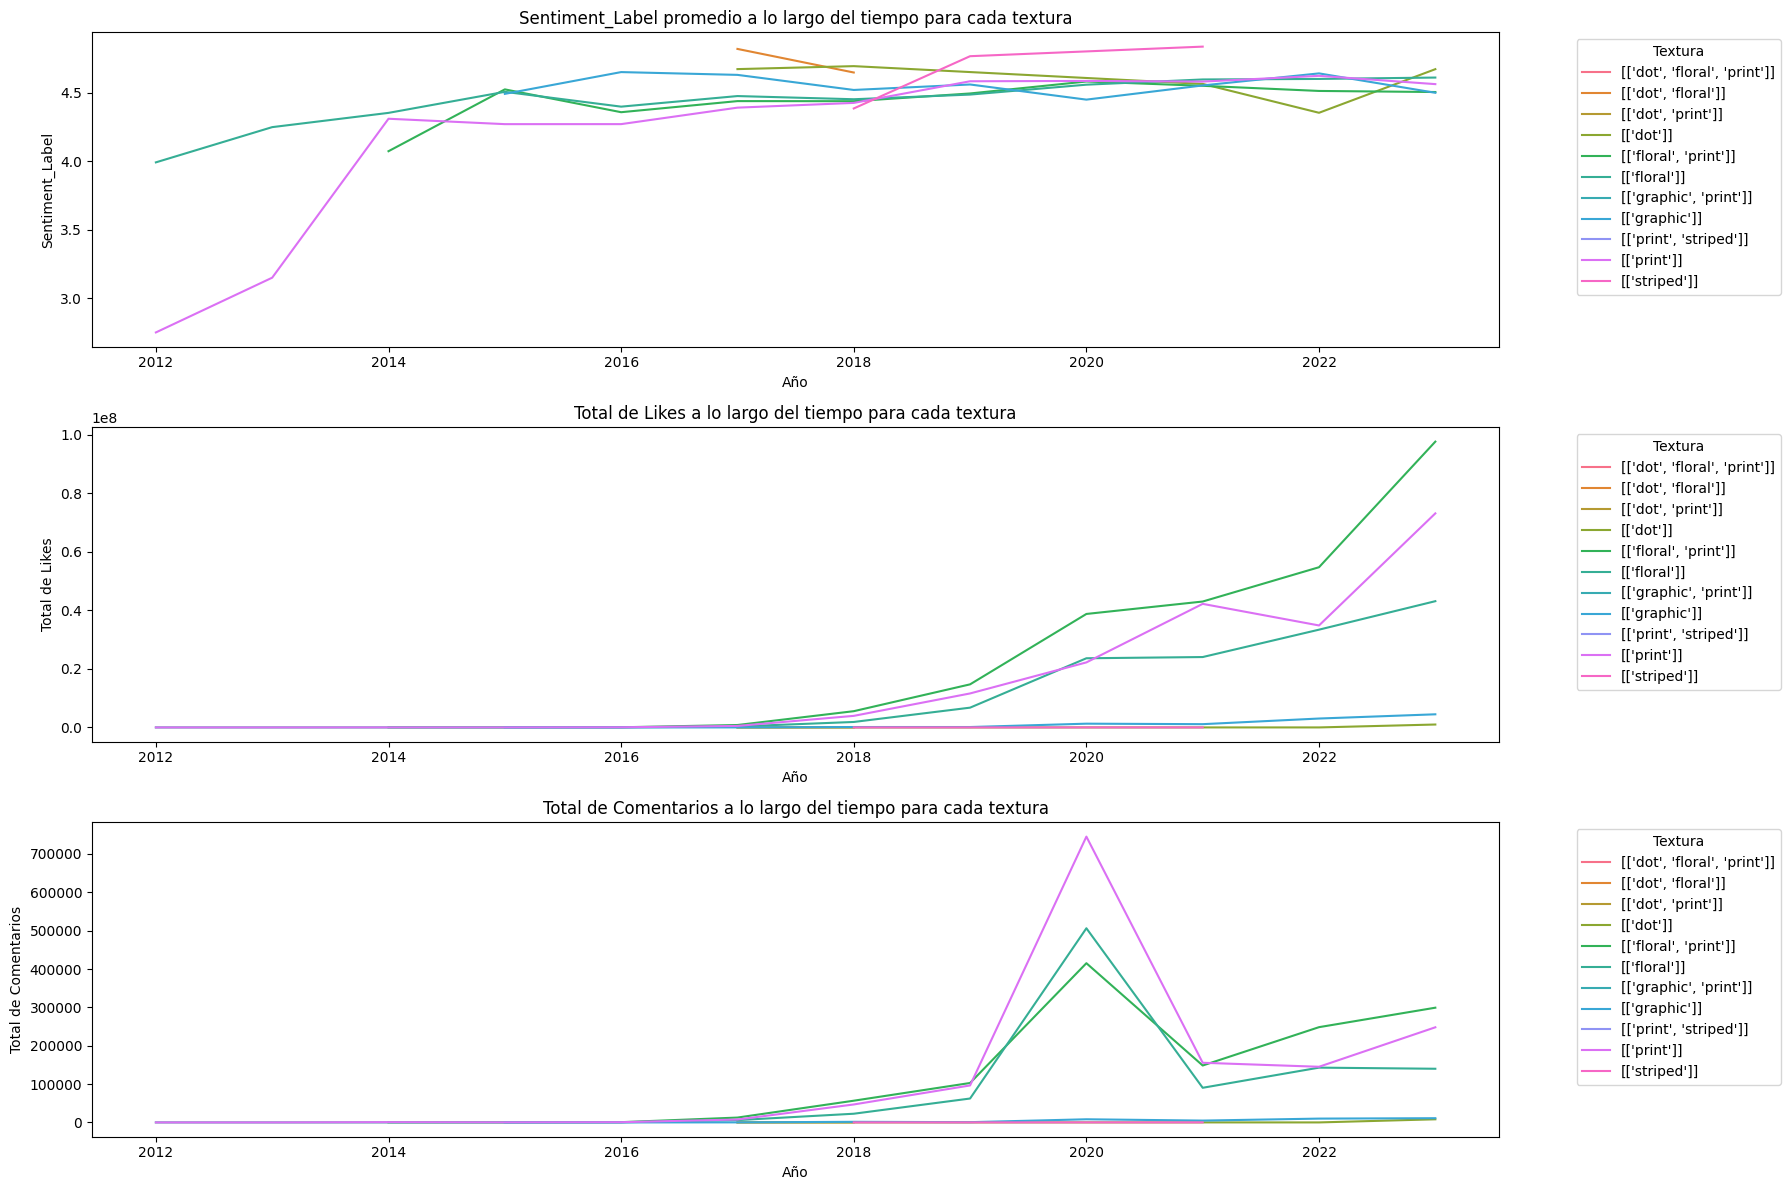

In [4]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Nombre del archivo completo
combined_file = 'completo.csv'  # Reemplaza con la ruta correcta

# Verifica si el archivo completo existe
if not os.path.exists(combined_file):
    print(f"El archivo completo '{combined_file}' no existe.")
    sys.exit()

# Lee el archivo completo
df_combined = pd.read_csv(combined_file)

# Función para generar los gráficos
def generar_graficos(df_combined):
    # Convertir la columna de textura a una lista de listas
    df_combined['textura'] = df_combined['textura'].apply(ast.literal_eval)

    # Explotar la columna de textura para que cada textura tenga su propia fila
    df_explotado = df_combined.explode('textura')

    # Convertir las texturas a una cadena
    df_explotado['textura'] = df_explotado['textura'].apply(str)

    # Convertir la columna de fecha a formato datetime con el formato específico
    df_explotado['date_local'] = pd.to_datetime(df_explotado['date_local'], format='%Y-%m-%d_%H-%M-%S_UTC')

    # Extraer el año de la columna de fecha
    df_explotado['year'] = df_explotado['date_local'].dt.year

    # Calcular el promedio de 'sentiment_label' para cada textura y año
    promedio_por_textura = df_explotado.groupby(['textura', 'year'])['sentiment_label'].mean().reset_index()

    # Calcular la cantidad total de likes para cada textura y año
    total_likes_por_textura = df_explotado.groupby(['textura', 'year'])['likes'].sum().reset_index()

    # Calcular la cantidad total de comentarios para cada textura y año
    total_comments_por_textura = df_explotado.groupby(['textura', 'year'])['comments'].sum().reset_index()

    # Configurar el tamaño de la figura
    plt.figure(figsize=(18, 12))

    # Graficar Sentiment_Label promedio
    plt.subplot(3, 1, 1)
    sns.lineplot(data=promedio_por_textura, x='year', y='sentiment_label', hue='textura', ci=None)
    plt.title('Sentiment_Label promedio a lo largo del tiempo para cada textura')
    plt.xlabel('Año')
    plt.ylabel('Sentiment_Label')
    plt.legend(title='Textura', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Graficar Total de Likes
    plt.subplot(3, 1, 2)
    sns.lineplot(data=total_likes_por_textura, x='year', y='likes', hue='textura', ci=None)
    plt.title('Total de Likes a lo largo del tiempo para cada textura')
    plt.xlabel('Año')
    plt.ylabel('Total de Likes')
    plt.legend(title='Textura', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Graficar Total de Comentarios
    plt.subplot(3, 1, 3)
    sns.lineplot(data=total_comments_por_textura, x='year', y='comments', hue='textura', ci=None)
    plt.title('Total de Comentarios a lo largo del tiempo para cada textura')
    plt.xlabel('Año')
    plt.ylabel('Total de Comentarios')
    plt.legend(title='Textura', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

# Genera los gráficos para el archivo combinado
generar_graficos(df_combined)


C:\Users\samuel\AppData\Local\Temp\ipykernel_3740\623796206.py:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=promedio_por_prediccion, x='year', y='sentiment_label', hue='prediccion', ci=None)
C:\Users\samuel\AppData\Local\Temp\ipykernel_3740\623796206.py:57: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=total_likes_por_prediccion, x='year', y='likes', hue='prediccion', ci=None)
C:\Users\samuel\AppData\Local\Temp\ipykernel_3740\623796206.py:65: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=total_comments_por_prediccion, x='year', y='comments', hue='prediccion', ci=None)


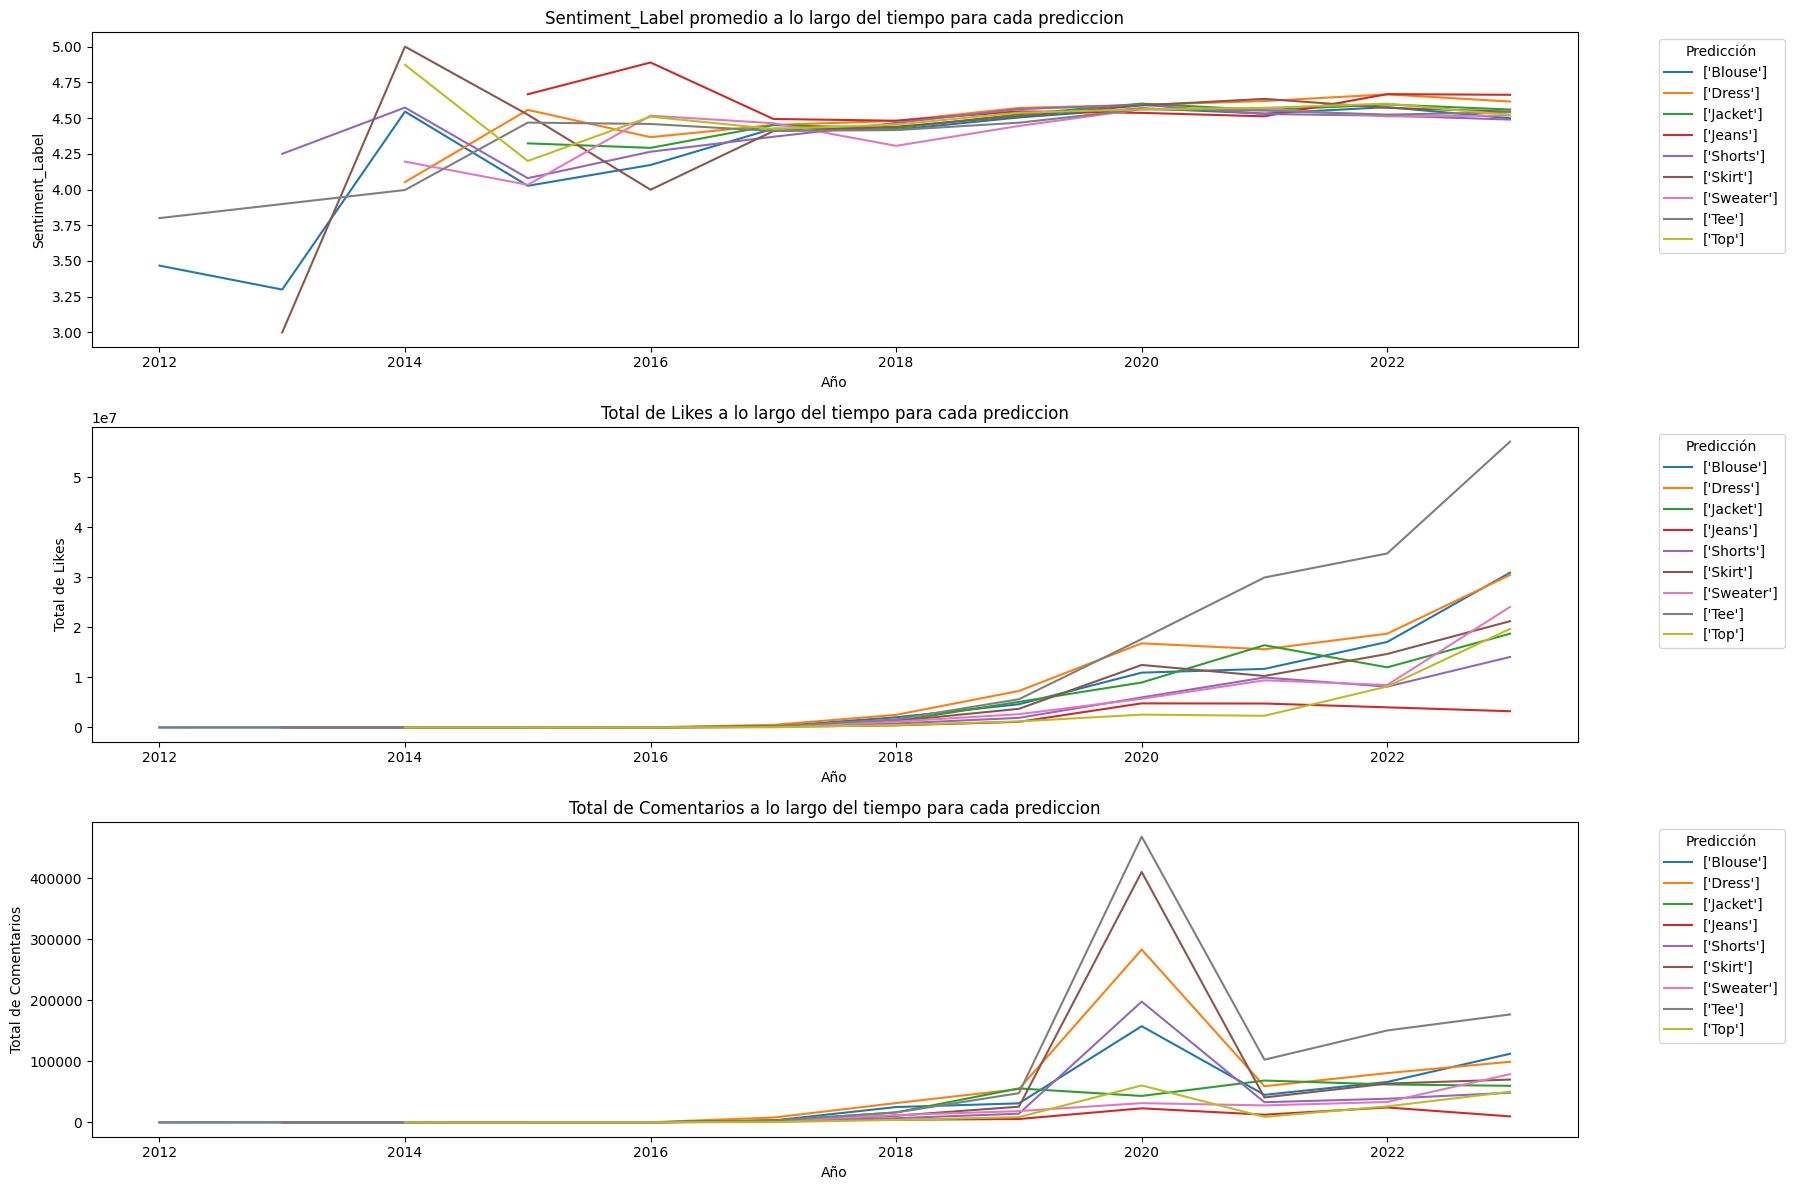

In [5]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Nombre del archivo combinado
combined_file = 'completo.csv'  # Reemplaza con la ruta correcta

# Verifica si el archivo combinado existe
if not os.path.exists(combined_file):
    print(f"El archivo combinado '{combined_file}' no existe.")
    sys.exit()

# Lee el archivo combinado
df_combined = pd.read_csv(combined_file)

# Función para generar los gráficos
def generar_graficos(df_combined):
    # Convertir la columna de prediccion a una lista de listas
    df_combined['prediccion'] = df_combined['prediccion'].apply(ast.literal_eval)

    # Explotar la columna de prediccion para que cada etiqueta tenga su propia fila
    df_explotado = df_combined.explode('prediccion')

    # Convertir las etiquetas a una cadena
    df_explotado['prediccion'] = df_explotado['prediccion'].apply(str)

    # Convertir la columna de fecha a formato datetime con el formato específico
    df_explotado['date_local'] = pd.to_datetime(df_explotado['date_local'], format='%Y-%m-%d_%H-%M-%S_UTC')

    # Extraer el año de la columna de fecha
    df_explotado['year'] = df_explotado['date_local'].dt.year

    # Calcular el promedio de 'sentiment_label' para cada prediccion y año
    promedio_por_prediccion = df_explotado.groupby(['prediccion', 'year'])['sentiment_label'].mean().reset_index()

    # Calcular la cantidad total de likes para cada prediccion y año
    total_likes_por_prediccion = df_explotado.groupby(['prediccion', 'year'])['likes'].sum().reset_index()

    # Calcular la cantidad total de comentarios para cada prediccion y año
    total_comments_por_prediccion = df_explotado.groupby(['prediccion', 'year'])['comments'].sum().reset_index()

    # Configurar el tamaño de la figura
    plt.figure(figsize=(18, 12))

    # Graficar Sentiment_Label promedio
    plt.subplot(3, 1, 1)
    sns.lineplot(data=promedio_por_prediccion, x='year', y='sentiment_label', hue='prediccion', ci=None)
    plt.title('Sentiment_Label promedio a lo largo del tiempo para cada prediccion')
    plt.xlabel('Año')
    plt.ylabel('Sentiment_Label')
    plt.legend(title='Predicción', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Graficar Total de Likes
    plt.subplot(3, 1, 2)
    sns.lineplot(data=total_likes_por_prediccion, x='year', y='likes', hue='prediccion', ci=None)
    plt.title('Total de Likes a lo largo del tiempo para cada prediccion')
    plt.xlabel('Año')
    plt.ylabel('Total de Likes')
    plt.legend(title='Predicción', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Graficar Total de Comentarios
    plt.subplot(3, 1, 3)
    sns.lineplot(data=total_comments_por_prediccion, x='year', y='comments', hue='prediccion', ci=None)
    plt.title('Total de Comentarios a lo largo del tiempo para cada prediccion')
    plt.xlabel('Año')
    plt.ylabel('Total de Comentarios')
    plt.legend(title='Predicción', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

# Genera los gráficos para el archivo combinado
generar_graficos(df_combined)


In [6]:
import pandas as pd
df = pd.read_csv('completo.csv')

df

,post_id,sentiment_label,prediccion,date_local,likes,comments,textura,Usuario
0,2436768575995168110,4.585366,"[['Shorts'], ['Tee'], ['Blouse'], ['Jeans'], [...",2020-11-06_23-31-12_UTC,1858,42,"[[['print']], [['print']], [['floral', 'print'...",anabelizam
1,2439557980809959490,5.000000,[['Jacket']],2020-11-10_19-53-15_UTC,321,1,[[['floral']]],anabelizam
2,2440483800015457194,4.710526,[['Dress']],2020-11-12_02-32-41_UTC,1822,38,[[['floral']]],anabelizam
3,2440986872999405163,5.000000,[['Skirt']],2020-11-12_19-12-12_UTC,869,7,[[['floral']]],anabelizam
4,2450438511560929966,4.782609,"[['Tee'], ['Tee'], ['Shorts'], ['Tee']]",2020-11-25_20-10-55_UTC,2628,25,"[[['floral']], [['print']], [['print']], [['pr...",anabelizam
...,...,...,...,...,...,...,...,...
3457,3180404575667700697,4.448718,[['Blouse']],2023-08-30_00-03-11_UTC,15913,84,[[['print']]],tutivargasm
3458,3188920324347756762,4.670103,"[['Tee'], ['Jeans'], ['Blouse'], ['Dress']]",2023-09-10_18-02-28_UTC,24886,114,"[[['print']], [['floral', 'print']], [['print'...",tutivargasm
3459,3197108441083638345,4.666667,"[['Shorts'], ['Dress']]",2023-09-22_01-10-47_UTC,10784,60,"[[['print']], [['print']]]",tutivargasm
3460,3202609016412337065,4.610390,[['Skirt']],2023-09-29_15-19-27_UTC,15199,104,"[[['floral', 'print']]]",tutivargasm
